# **Tourism Final Project**

## Background

A tourism company is planning to introduce a new travel package. Currently the company is offering the following packages: Basic, Standard, Deluxe, Super Deluxe and King. The company wants the data scientist to analyze the dataset and build a model to predict those customers who would most likely purchase a new travel package. 

## Objective

* To build a model that will predict which customers are more likely to buy a new travel package.
* To determine which features are most important in model prediction.

## Data Description

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of the customer 
* TypeofContact: How the customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e., Tier 1 > Tier 2 > Tier 3
* DurationOfPitch: Duration of the pitch by a salesperson to the customer
* Occupation: Occupation of customer
* Gender: The gender of the customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* ProductPitched: Product pitched by the salesperson
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of the customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* PitchSatisfactionScore: Sales pitch satisfaction score
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with ages less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

# **Importing Libraries**

In [115]:
!pip install nb_black

<IPython.core.display.Javascript object>

In [116]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import re


# Libraries to help with data visualization
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV

import multiprocessing

no_cpus = multiprocessing.cpu_count()

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)


# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## **Loading Data**

In [5]:
data = pd.read_csv("Tourism_dataset.csv")

<IPython.core.display.Javascript object>

In [6]:
# Viewing first 5 rows of the dataset
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<IPython.core.display.Javascript object>

In [7]:
# Viewing last 5 rows of the dataset
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


<IPython.core.display.Javascript object>

In [8]:
# Getting the shape of the dataset
data.shape

(4888, 20)

<IPython.core.display.Javascript object>

Observation: The dataset has 20 columns and 4888 observations.

In [9]:
# Printing the columns
print(data.columns)

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


<IPython.core.display.Javascript object>

In [10]:
# Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

Observation: We can see that we have some int64, float64 and object variables. Type of contact, occupation, Gender, Product Pitched, Marital Status, and designation are objects which we will later on turn them into categorical variables.

In [11]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [12]:
# Let's drop the duplicate values
data.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [13]:
# Making sure there are no duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

Observation: The first time i ran my codes i saw there were some duplicates, so i am making sure i have dropped all duplicates.

In [14]:
# Checking the dataset for missing values
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

Observation: Age, TypeofContact, DurationofPitch, NumberofFollowups, PreferredPropertyStar, NumberofTrips, NumberofChildrenvisiting, and MonthlyIncome have missing values. We will be using KNN imputer later on to make sure all missing values are taken care of.

# **Fixing the data** 

In [15]:
# Selecting columns all columns of datatype object
cols = data.select_dtypes(["object"])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

<IPython.core.display.Javascript object>

In [16]:
# Converting object type into categorical variables
for i in cols.columns:
    data[i] = data[i].astype("category")

<IPython.core.display.Javascript object>

In [17]:
# Printing new data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

<IPython.core.display.Javascript object>

Observation: All object variables are now categorical variables.

# **Summary of numerical features**

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


<IPython.core.display.Javascript object>

Observations:
* Customer ID is not useful for this project; therefore we will be dropping this column.
* Average age in this dataset is 37-38 years old.
* The average city tier is 1.65, customers live in a city tier between 1-2.
* The average duration of pitch is 15.5 mins.
* The average number of people planning to take trips is 2.9, rounded to 3 people.
* 75% of the data included 4 number of followups.
* Customers preferred 3-4 star properties.
* The average number of trips is 3.23, rounded to 3 trips per year.
* Most customers did not have a passport.
* The average pitch statisfaction score is 3.07, rounded to 3. 
* Most customers did own a car. 
* The average number of children visiting is 1.18, rounded to 1.
* The average Monthly income is 23,619.85. 
* We can see that the Max of Duration of Pitch, Number of Trips and Monthly income are pretty far from the 25,50,and 75% numbers, therefore, we know these variables will have outliers.

# **Summary of categorical features**

In [19]:
data.describe(include=["category"]).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


<IPython.core.display.Javascript object>

Dropping the CustomerID column

In [20]:
data.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# **Looking at the unqiue values of all the categories**

In [21]:
cols_cat = data.select_dtypes(["category"])

<IPython.core.display.Javascript object>

In [22]:
for i in cols_cat.columns:
    print("Unique values in", i, "are :")
    print(cols_cat[i].value_counts())
    print("*" * 50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

<IPython.core.display.Javascript object>

Observation: From the unique values of all categorical variables we can see that for gender- there are 155 observations entered as "Fe Male", we will need to replace those to "Female". Furthermore, in Marital Status we see that 682 observation are entered as "Unmarried"; we can combine all these observations with "Single".

In [23]:
# Replacing Fe Male with Female
data["Gender"] = data["Gender"].replace("Fe Male", "Female")

<IPython.core.display.Javascript object>

In [24]:
# Replacing Unmarried with Single
data["MaritalStatus"] = data["MaritalStatus"].replace("Unmarried", "Single")

<IPython.core.display.Javascript object>

Making sure the replacements worked

In [25]:
data.Gender.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

<IPython.core.display.Javascript object>

In [26]:
data.MaritalStatus.unique()

['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']

<IPython.core.display.Javascript object>

# **Univariate analysis**

In [27]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

Some numerical variables in this dataset should be categorical such as ProdTaken, CityTier, NumberofPersonVisiting, NumberOfFollowups, PreferredPropertyStar, Passport, PitchSatisfactionScore, OwnCar and NumberOfChildrenVisiting. I believe for those variables the perc on bar would be a better fit.

In [28]:
# Bar plot is more effective in visualizing categorical data
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**ProdTaken**

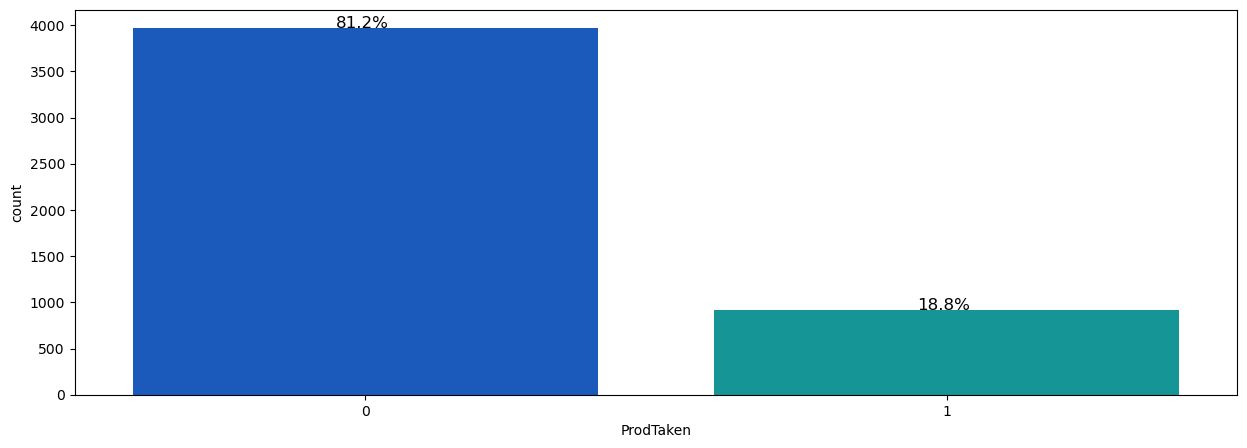

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["ProdTaken"], palette="winter")
perc_on_bar(ax, data["ProdTaken"])

Observation: ProdTaken is our target variable, we can see that most customers in our data set did not take the travel package. There is some data imbalance. 

**Age**

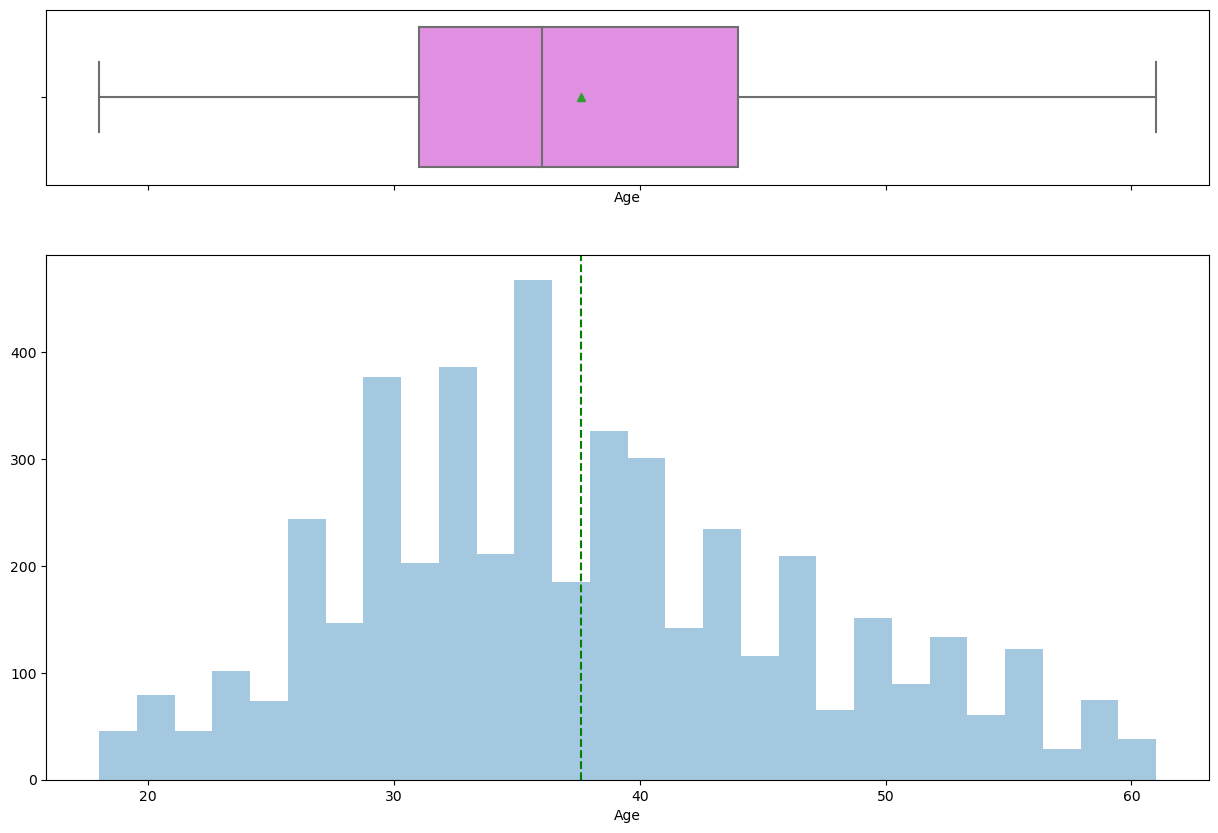

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data["Age"])

Observation: Most customers in our dataset are around 36-37 years old. There are no outliers in this variable.

**CityTier**

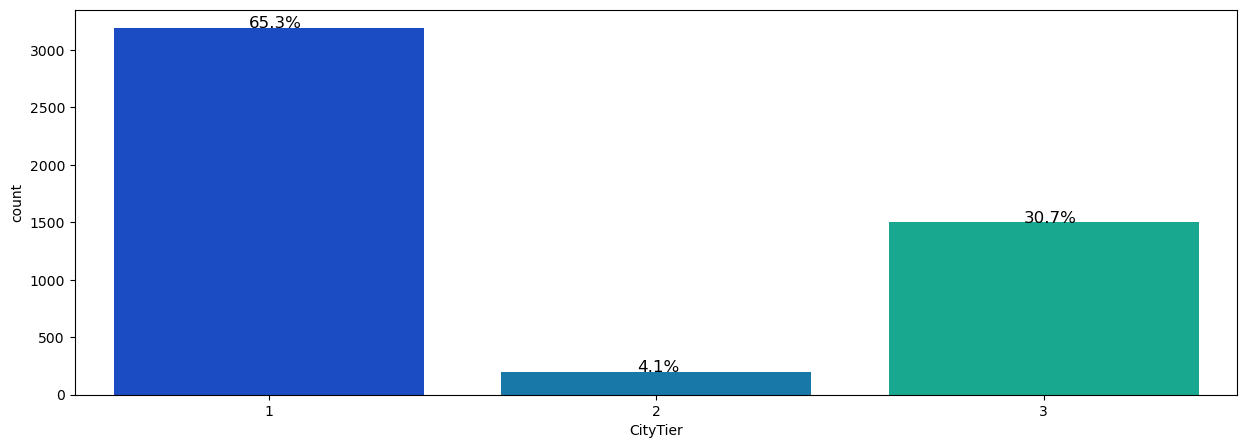

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["CityTier"], palette="winter")
perc_on_bar(ax, data["CityTier"])

Observation: Most of our customers lived in CityTier 1.

**DurationOfPitch**

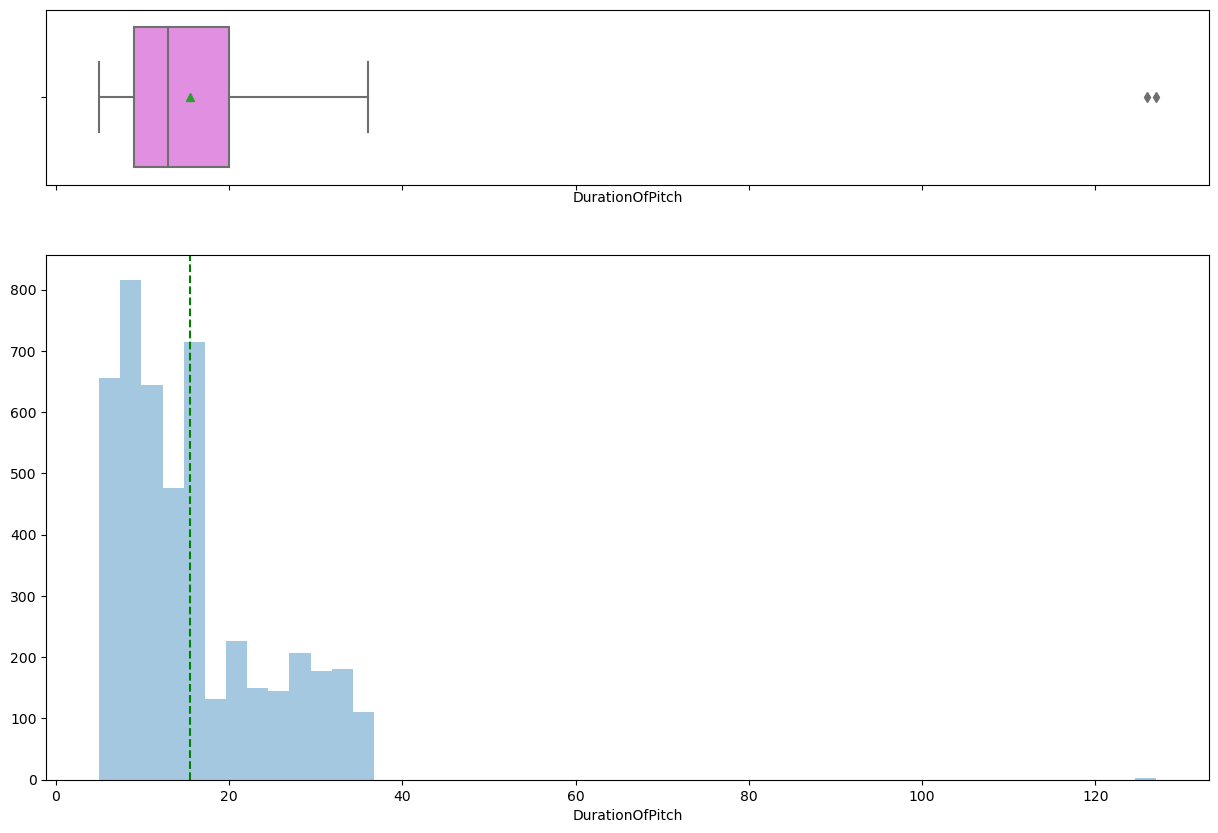

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data["DurationOfPitch"])

Observation: We can see that Duration of Pitch is Right Skewed, most pitches are under 20 mins. We can see there are two outliers in the far right; therefore, in order to not loose any information we will go ahead and clip those two observations.

In [33]:
data[data["DurationOfPitch"] > 40]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


<IPython.core.display.Javascript object>

In [34]:
# Checking 10 largest DurationOfPitch values
data.DurationOfPitch.nlargest(10)

3878    127.0
1434    126.0
2505     36.0
2585     36.0
2643     36.0
2648     36.0
2703     36.0
2715     36.0
2796     36.0
2853     36.0
Name: DurationOfPitch, dtype: float64

<IPython.core.display.Javascript object>

In [35]:
# Capping values for DurationOfPitch with 36.0
data["DurationOfPitch"].clip(upper=36.0, inplace=True)

<IPython.core.display.Javascript object>

**NumberOfPersonVisiting**

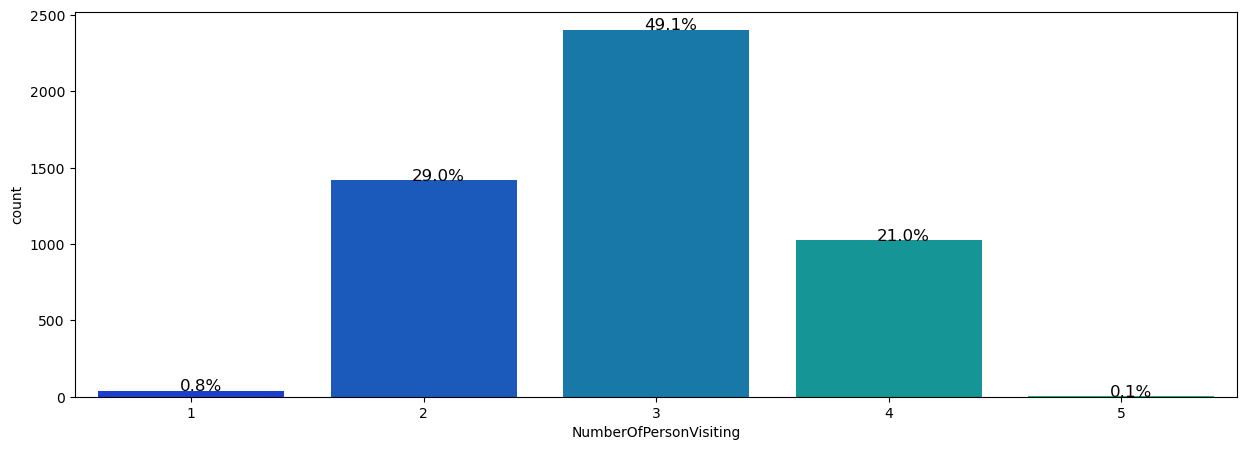

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["NumberOfPersonVisiting"], palette="winter")
perc_on_bar(ax, data["NumberOfPersonVisiting"])

Observation: Most number of people taking the trips is 3. 

**NumberOfFollowups**

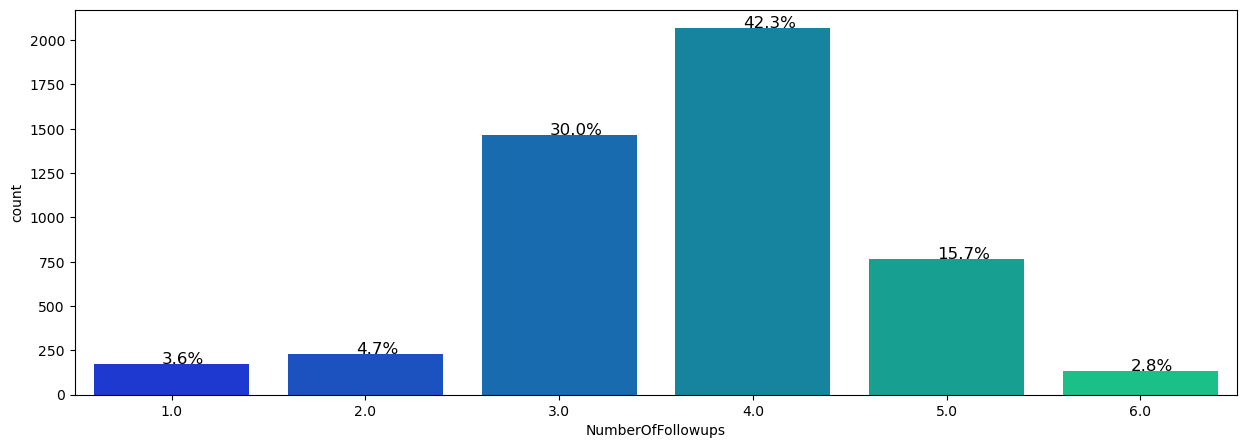

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["NumberOfFollowups"], palette="winter")
perc_on_bar(ax, data["NumberOfFollowups"])

Observation: Most number of followups is 4.

**PreferredPropertyStar**

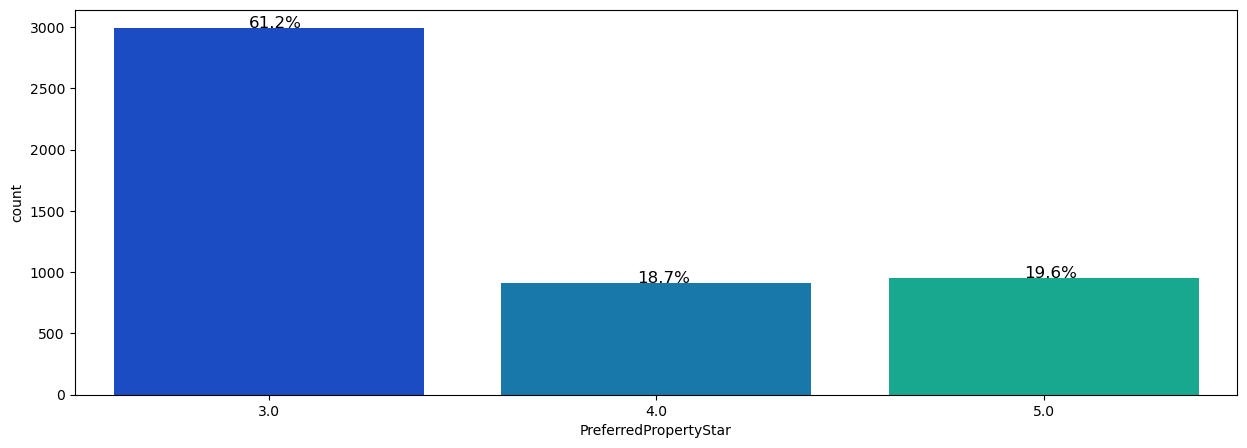

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["PreferredPropertyStar"], palette="winter")
perc_on_bar(ax, data["PreferredPropertyStar"])

Observation: Preferred property star in this dataset is 3.

**NumberOfTrips**

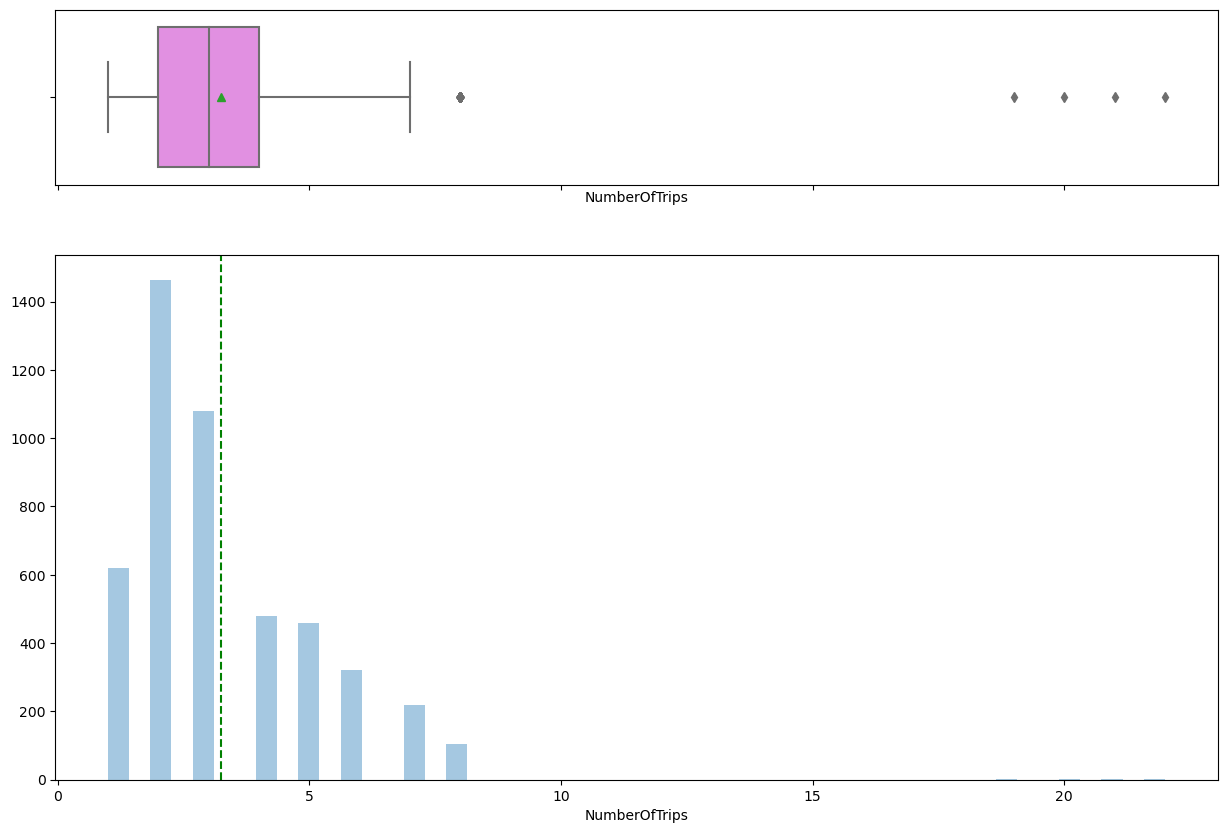

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(data["NumberOfTrips"])

Observation: The most number of trips per year in this dataset is 2-3. However, we have some outliers in the far right. In order to not loose any information, we will clip those observations.

In [40]:
data[data["NumberOfTrips"] > 8]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Single,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Single,22.0,0,2,1,1.0,Manager,25460.0


<IPython.core.display.Javascript object>

In [41]:
# Checking 10 largest Number of Trips value
data.NumberOfTrips.nlargest(10)

3260    22.0
816     21.0
2829    20.0
385     19.0
2446     8.0
2453     8.0
2558     8.0
2579     8.0
2603     8.0
2605     8.0
Name: NumberOfTrips, dtype: float64

<IPython.core.display.Javascript object>

In [42]:
# Capping values for number of trips with 8
data["NumberOfTrips"].clip(upper=8, inplace=True)

<IPython.core.display.Javascript object>

**Passport**

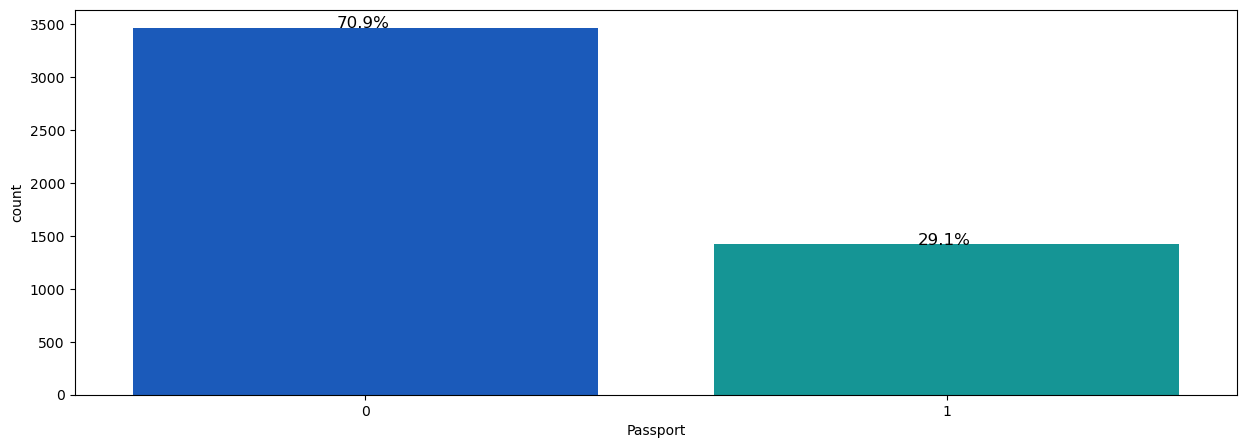

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Passport"], palette="winter")
perc_on_bar(ax, data["Passport"])

Observation: Most customers in our data set did not have a passport.

**PitchSatisfactionScore**

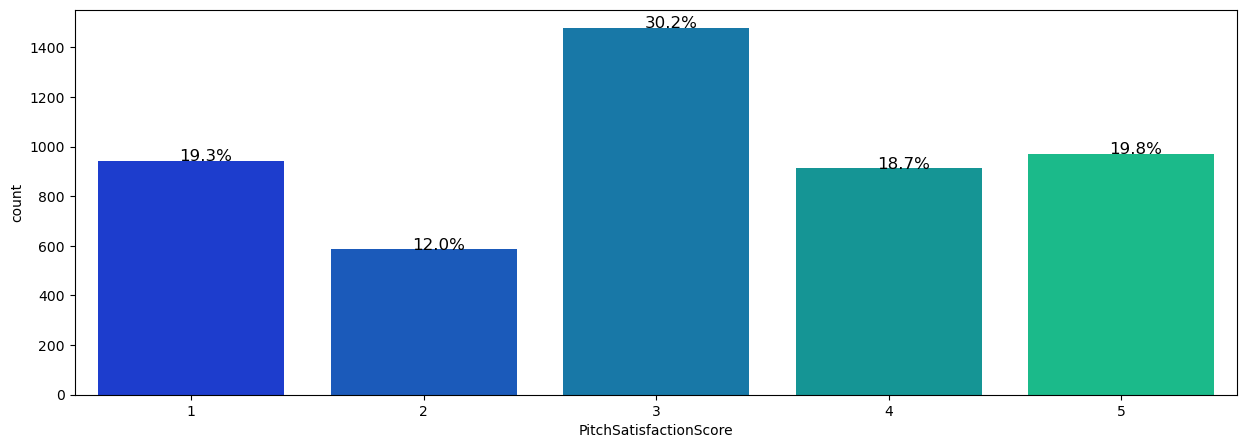

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["PitchSatisfactionScore"], palette="winter")
perc_on_bar(ax, data["PitchSatisfactionScore"])

Observation: Most customers rated the sales satisfaction score as 3.

**OwnCar**

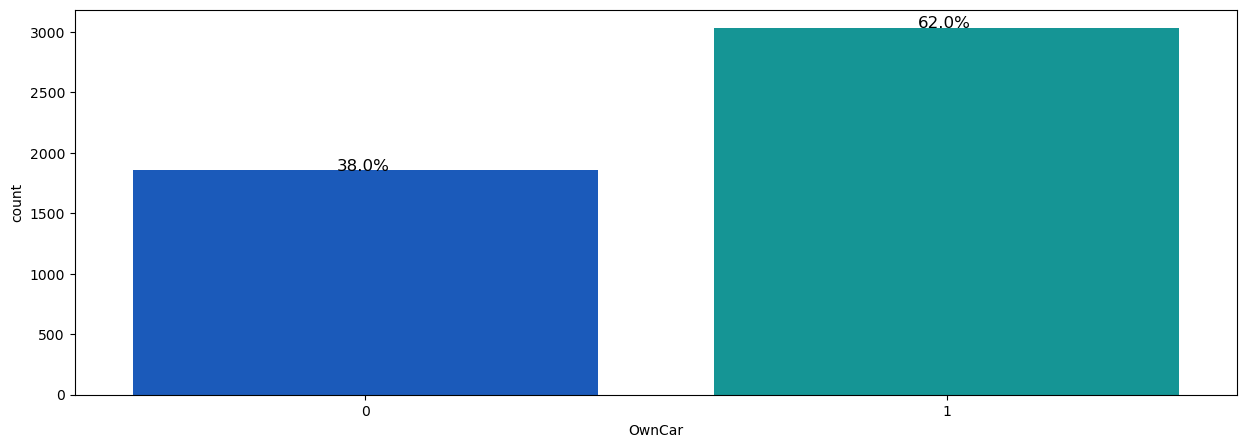

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["OwnCar"], palette="winter")
perc_on_bar(ax, data["OwnCar"])

Observation: Most customers did own a car.

**NumberOfChildrenVisiting**

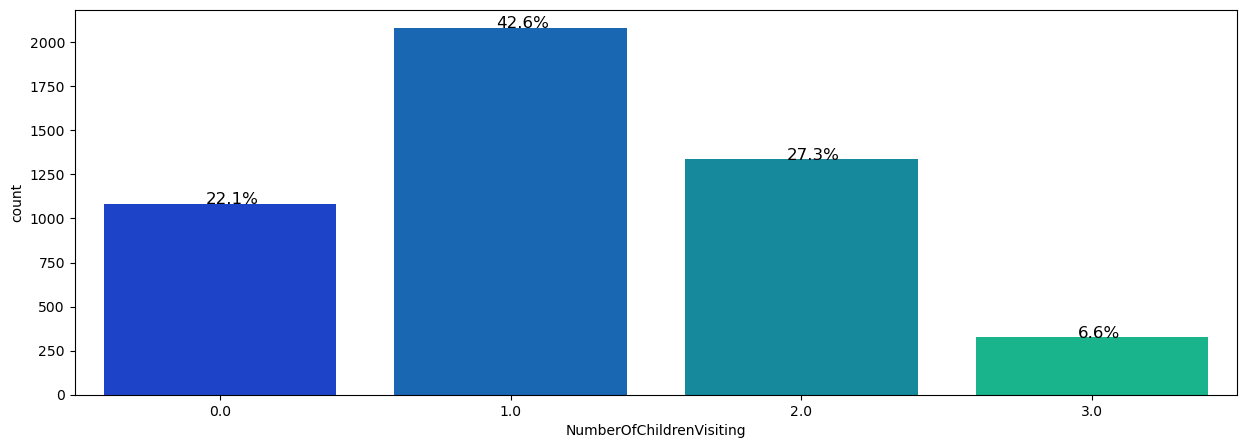

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["NumberOfChildrenVisiting"], palette="winter")
perc_on_bar(ax, data["NumberOfChildrenVisiting"])

Observation: Most number of children planning to take the trip with the customer is 1.

**MonthlyIncome**

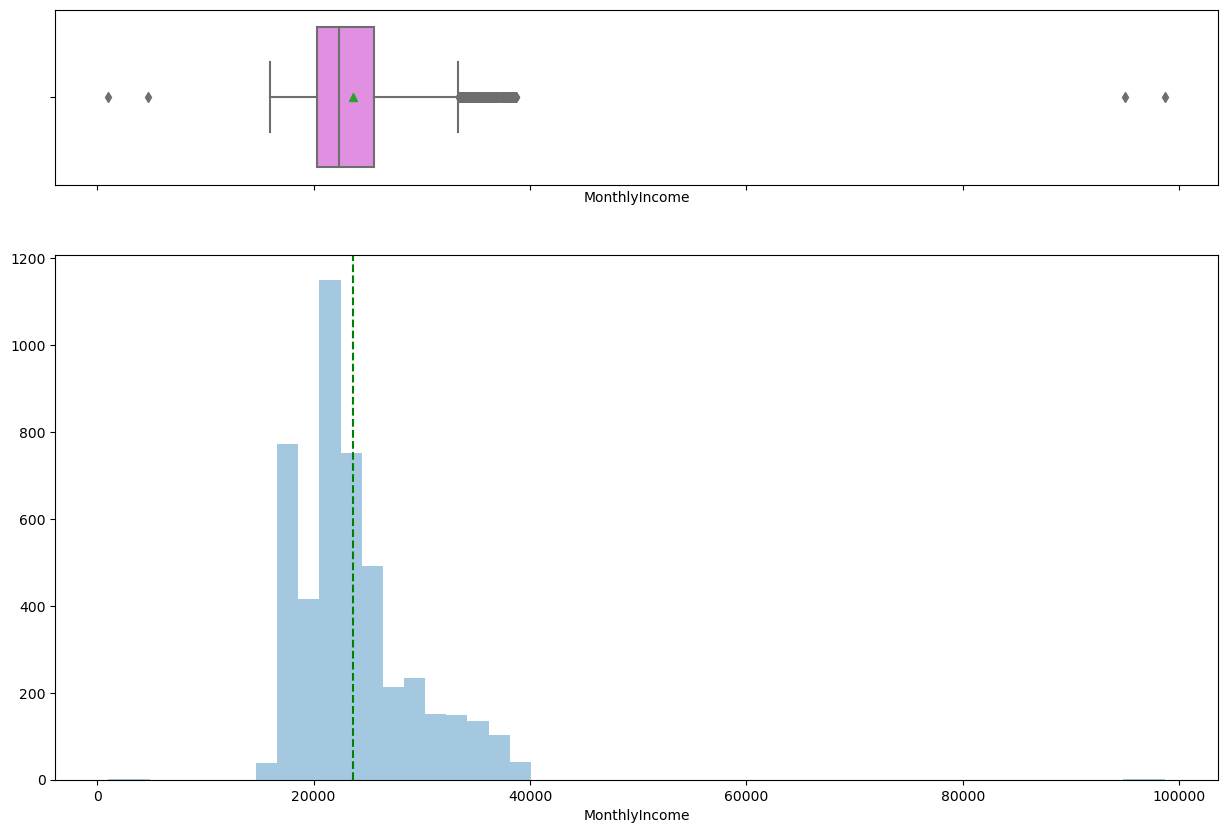

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(data["MonthlyIncome"])

Observation:
* Monthly income is right skewed. Most of the customers monthly income is around 22-24,000.
* There are two observations to the right extreme which can be considered as outliers.
* We will not remove all such data points as they represent real market trends but we can cap some of the extreme values.

In [48]:
data[data["MonthlyIncome"] > 40000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


<IPython.core.display.Javascript object>

In [49]:
# Checking 10 largest monthly income value
data.MonthlyIncome.nlargest(10)

2482    98678.0
38      95000.0
2634    38677.0
4104    38677.0
3190    38651.0
4660    38651.0
3295    38621.0
4765    38621.0
2609    38604.0
4079    38604.0
Name: MonthlyIncome, dtype: float64

<IPython.core.display.Javascript object>

In [50]:
# Capping values for monthly income at 38.677.0
data["MonthlyIncome"].clip(upper=38677.0, inplace=True)

<IPython.core.display.Javascript object>

# **Categorical Features**

**TypeofContact**

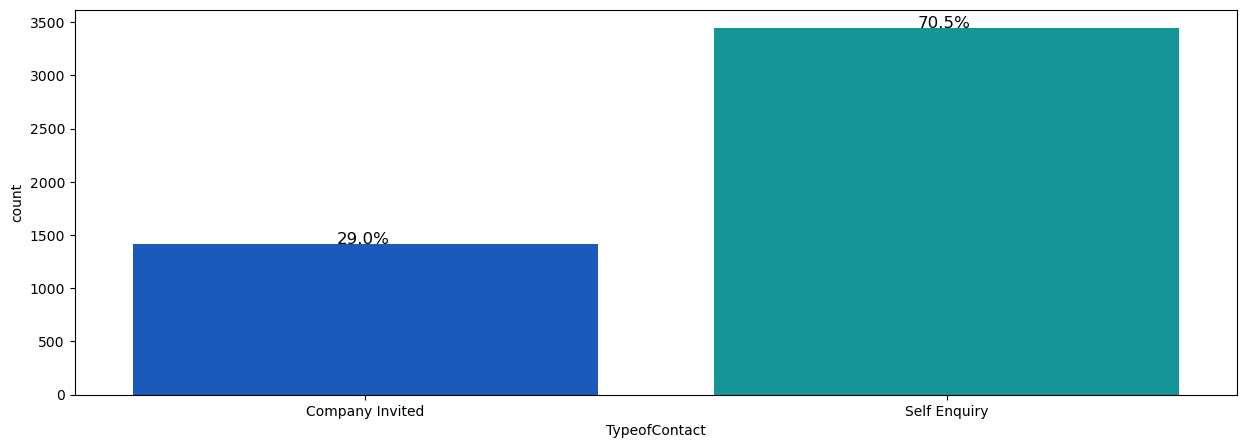

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["TypeofContact"], palette="winter")
perc_on_bar(ax, data["TypeofContact"])

Observation: Most customers were contacted by self enquiry.

**Occupation**

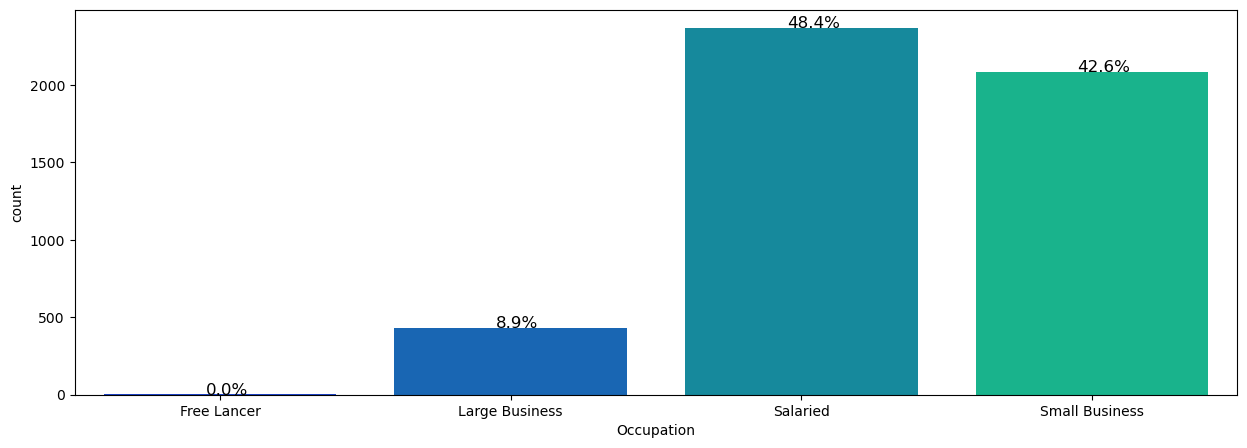

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Occupation"], palette="winter")
perc_on_bar(ax, data["Occupation"])

Observation: Most customers in our data set are salaried.

**Gender**

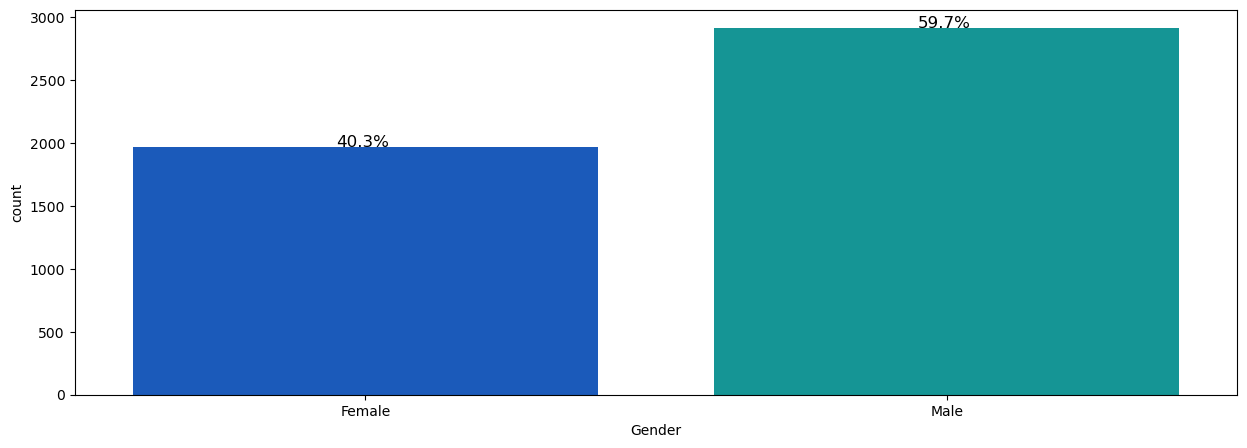

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Gender"], palette="winter")
perc_on_bar(ax, data["Gender"])

Observation: Most customers are males.

**ProductPitched**

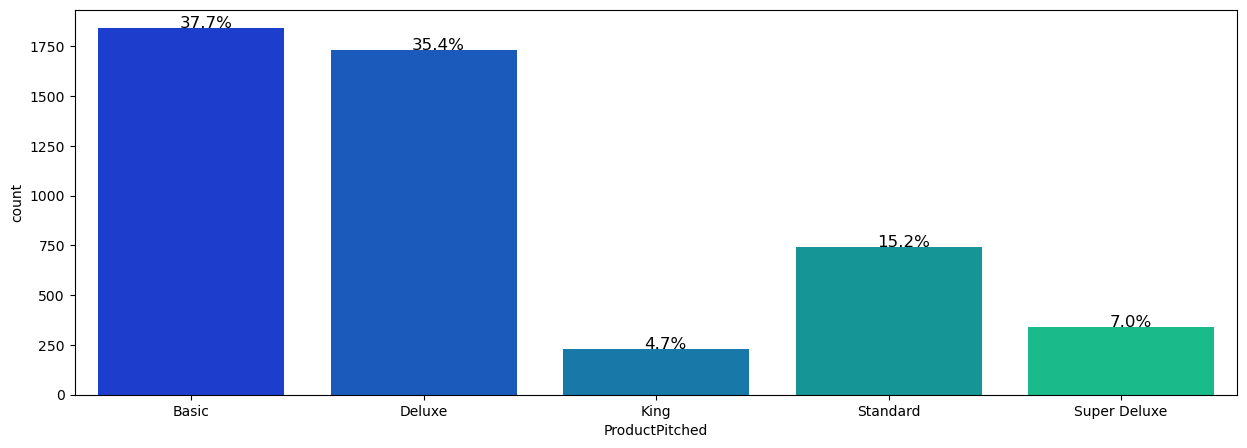

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["ProductPitched"], palette="winter")
perc_on_bar(ax, data["ProductPitched"])

Observation: Most product pitched was the basic package.

**MaritalStatus**

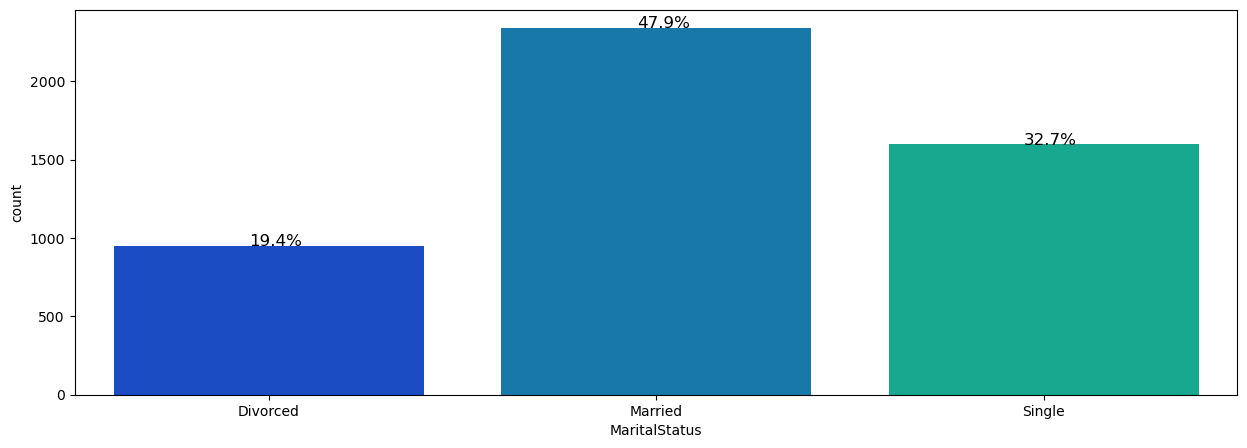

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["MaritalStatus"], palette="winter")
perc_on_bar(ax, data["MaritalStatus"])

Observation: Most customers are married.

**Designation**

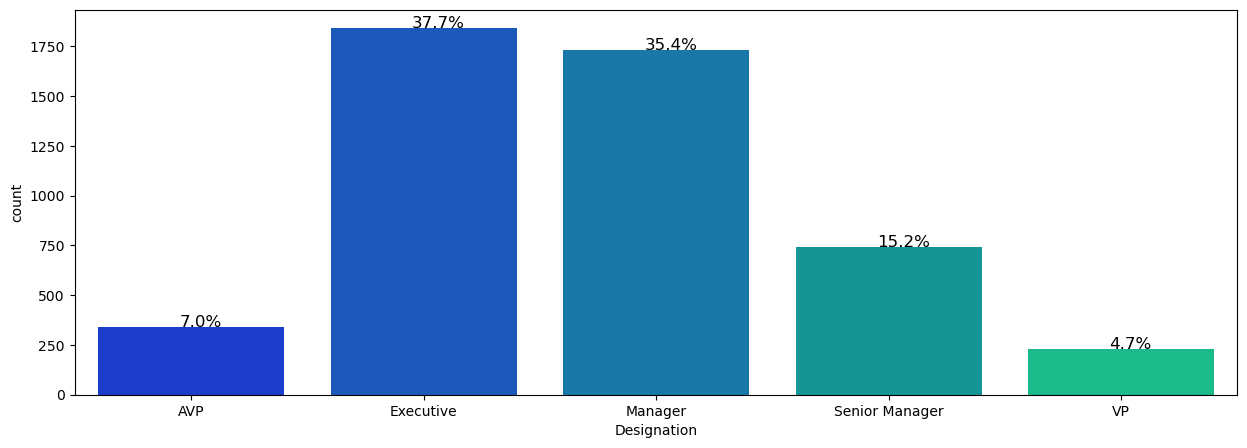

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Designation"], palette="winter")
perc_on_bar(ax, data["Designation"])

Observation: Most customers are executives.

# **Bivariate Analysis**

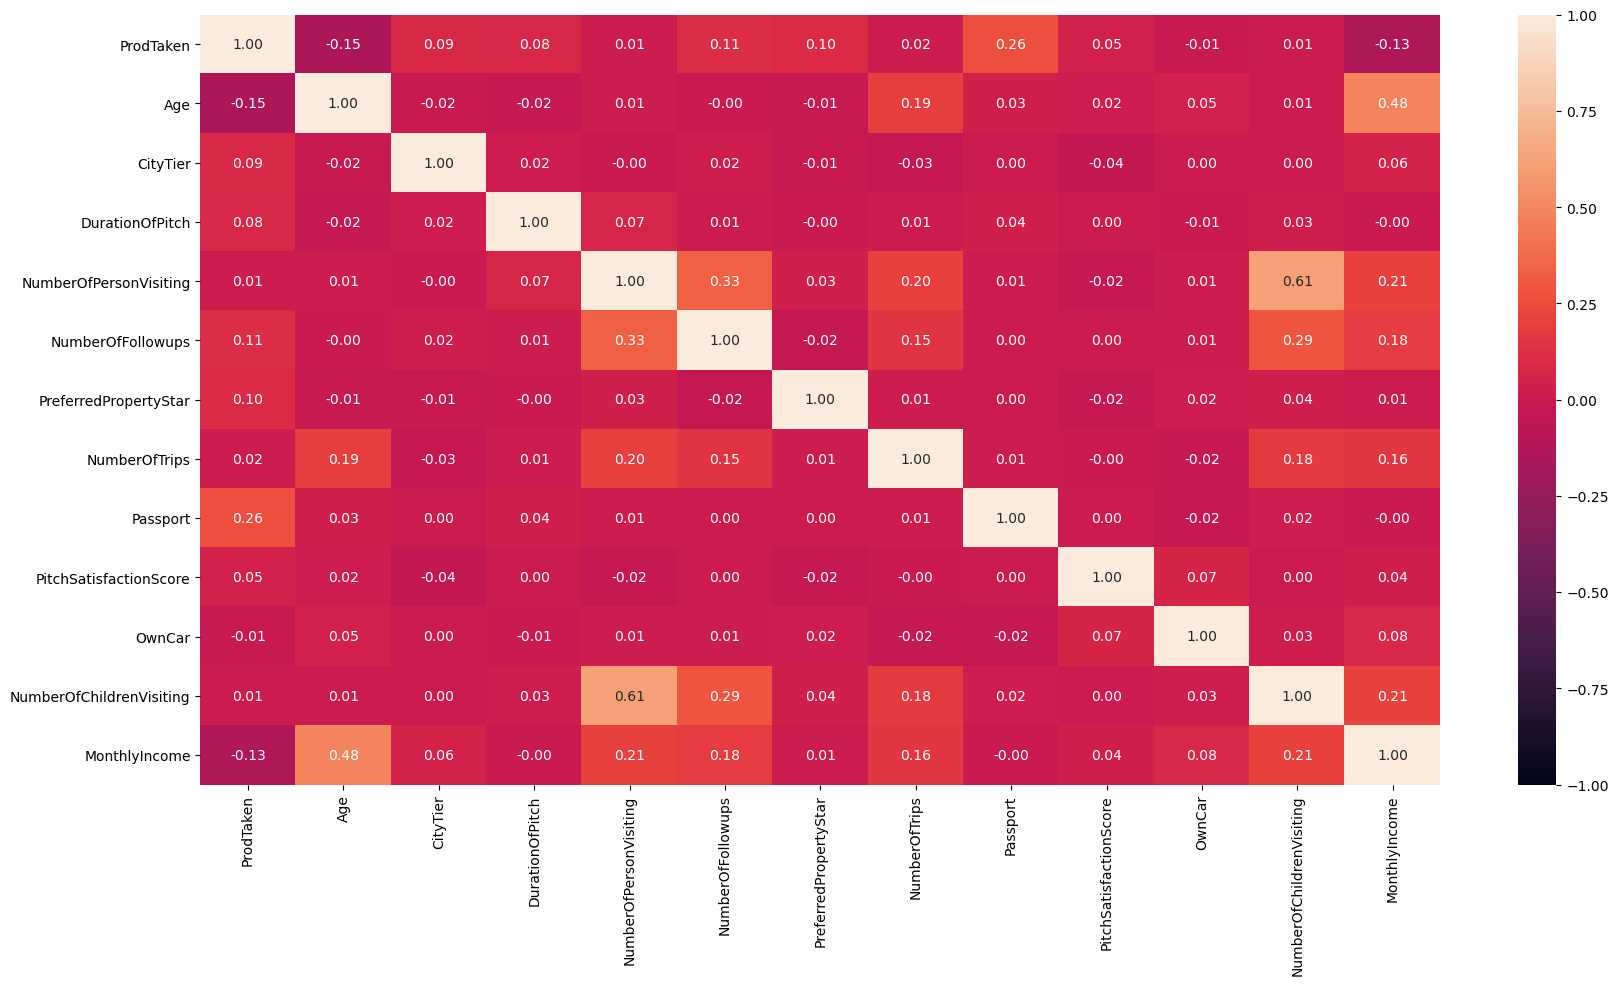

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

Observations:
* The highest positive correlated variable with our target variable(Prod Taken) is Passport. Therefore, having a passport or not ready for travel would be essential to customers purchasing a travel package or not. 
* The highest negatively correlated variable with our target variable is Monthly income.
* Monthly income's highest correlated variables were: age, number of person visiting and number of children visiting.
* Number of children visiting is highly correlated with number of person visiting. 
* Number of followups is correlated to number of person visiting.

# **Comparing the target variable with other variables**

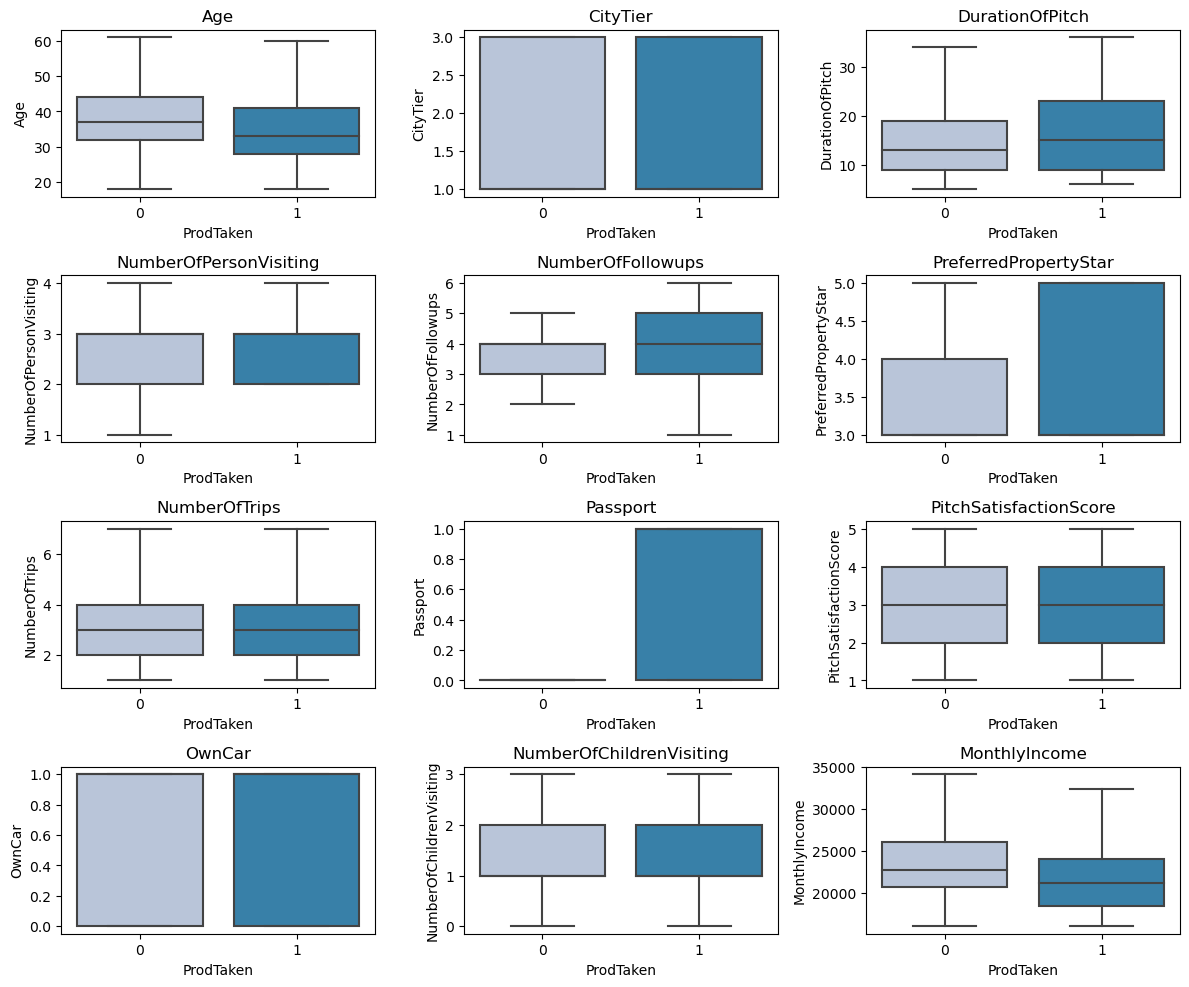

<IPython.core.display.Javascript object>

In [58]:
cols = data[
    [
        "Age",
        "CityTier",
        "DurationOfPitch",
        "NumberOfPersonVisiting",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "Passport",
        "PitchSatisfactionScore",
        "OwnCar",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].columns.tolist()
plt.figure(figsize=(12, 12))

for i, variable in enumerate(cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data["ProdTaken"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observations:
* We can see that younger people were purchasing a travel package more than older.
* People who purchased a travel package had a longer duration sales pitch.
* Customers who purchased a travel package had more followups. 
* Customers who purchased a travel package had a passport and also preferred higher property star ratings.
* Customers who purchased a travel package had a lower monthly income than does who didnt purchase one.

In [59]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["ProdTaken"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["ProdTaken"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**ProdTaken Vs. TypeofContact**

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


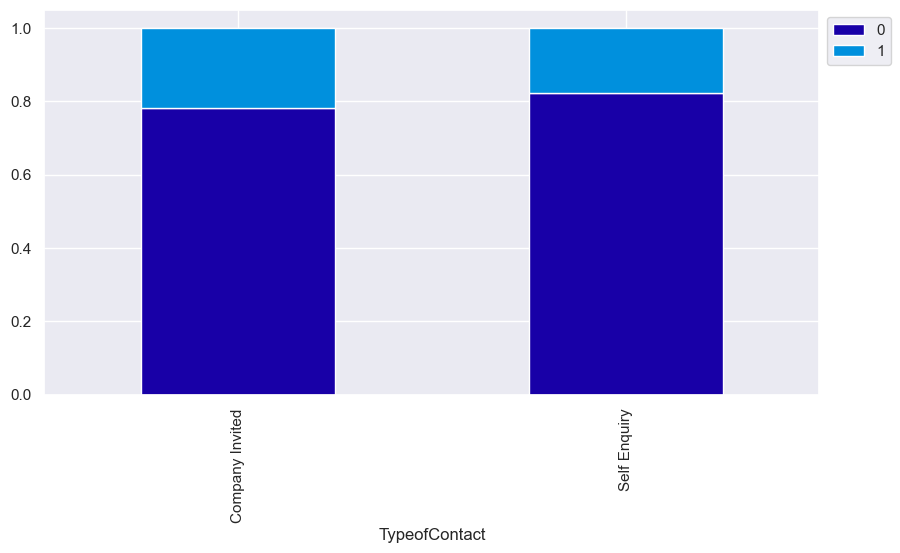

<IPython.core.display.Javascript object>

In [60]:
stacked_plot(data["TypeofContact"])

Observation: Even though only 1419 customers were Company invited; they bought more packages than those who where self enquiry type of contacts.

**ProdTaken Vs. Occupation**

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


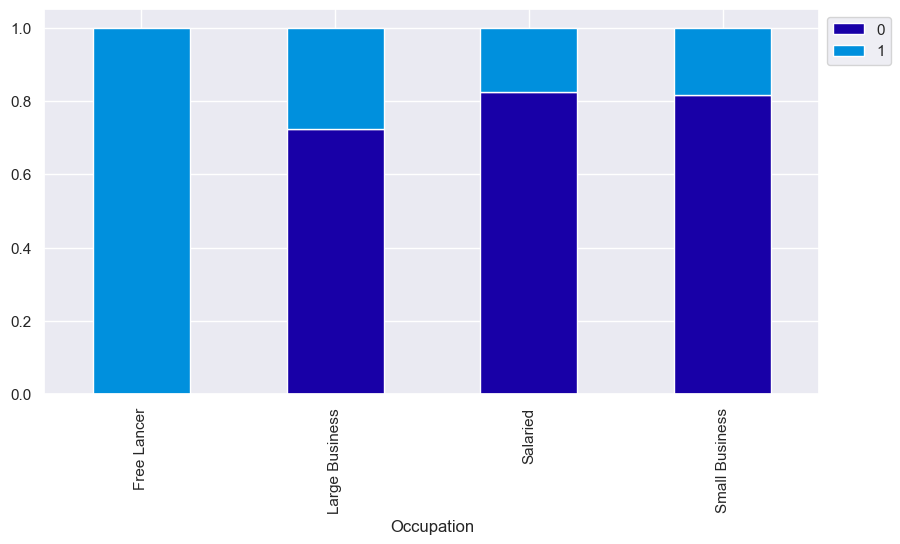

<IPython.core.display.Javascript object>

In [61]:
stacked_plot(data["Occupation"])

Observation: Even though smaller business customers were only 2084 customers in our data; 384 ended up purchasing a travel package. We can also see that both freelancers ended up purchasing a travel package as well.

**ProdTaken Vs. Gender**

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


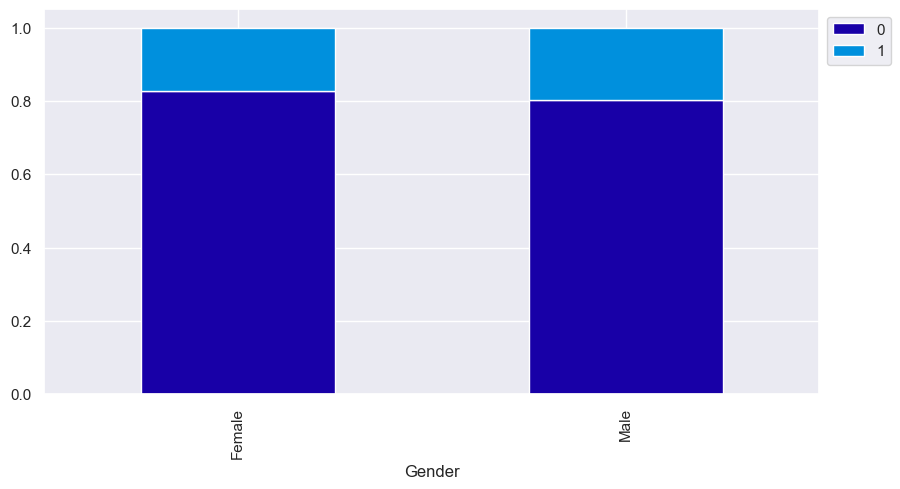

<IPython.core.display.Javascript object>

In [62]:
stacked_plot(data["Gender"])

Observation: Even though our dataset has more males than females we see that in terms of the percent purchasing a package, they are almost the same; however, males purchased a bit more travel packages than females.

**ProdTaken Vs. ProductPitched**

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


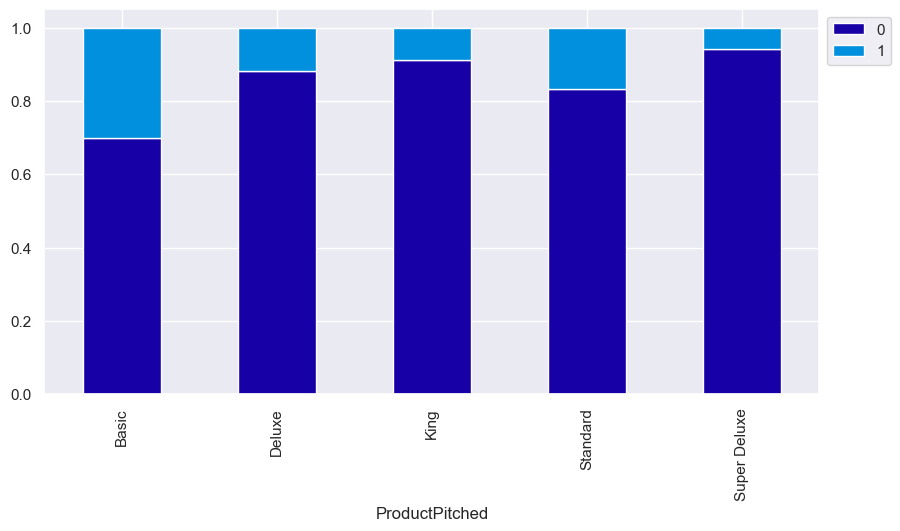

<IPython.core.display.Javascript object>

In [63]:
stacked_plot(data["ProductPitched"])

Observation: Customers pitched the basic package ended up purchasing the package more than any other package. 

**ProdTaken Vs. Marital Status**

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single         1128  470  1598
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


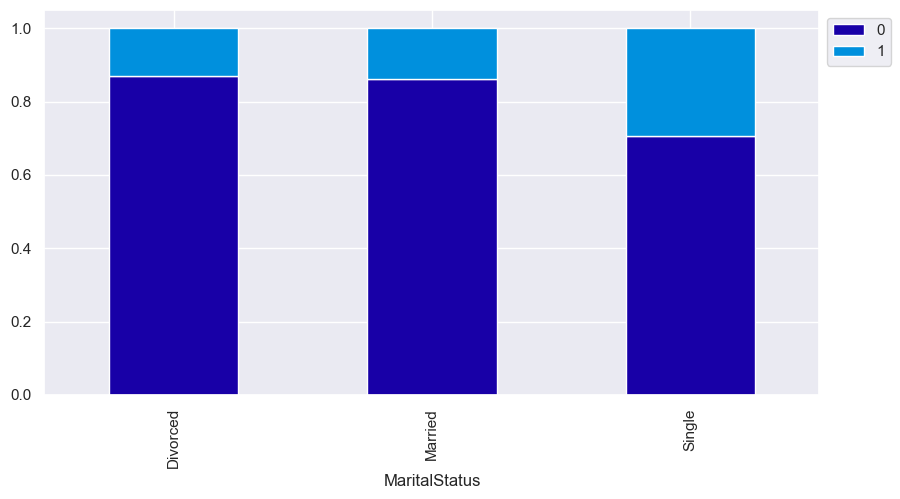

<IPython.core.display.Javascript object>

In [64]:
stacked_plot(data["MaritalStatus"])

Observation: Even though there are only 1598 single customers in the dataset, we can see that most of them did purchase a travel package.

**ProdTaken Vs. Designation**

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


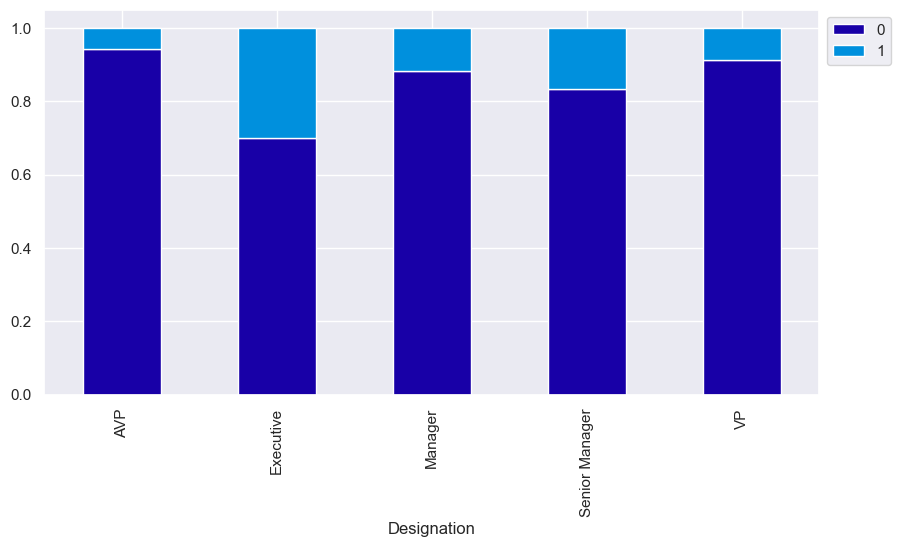

<IPython.core.display.Javascript object>

In [65]:
stacked_plot(data["Designation"])

Observation: We can see that most executives purchased a travel package.

# **Missing Value Treatment**

**Missing value treatment KNN imputer**

In [66]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<IPython.core.display.Javascript object>

Observations: Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips and MonthlyIncome have missing values.

In [67]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [68]:
# defining a list with names of columns that will be used for imputation- we will be using all columns
reqd_col_for_impute = list(data.columns)

<IPython.core.display.Javascript object>

In [69]:
reqd_col_for_impute.remove("ProdTaken")
reqd_col_for_impute

['Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation',
 'MonthlyIncome']

<IPython.core.display.Javascript object>

In [70]:
# we need to pass numerical values for each categorical column for KNN imputation so we will be encoded
Gender = {"Male": 0, "Female": 1}
data["Gender"] = data["Gender"].map(Gender)

Designation = {
    "Executive": 0,
    "Manager": 1,
    "Senior Manager": 2,
    "AVP": 3,
    "VP": 4,
}

data["Designation"] = data["Designation"].map(Designation)

MaritalStatus = {
    "Divorced": 0,
    "Single": 1,
    "Married": 2,
}
data["MaritalStatus"] = data["MaritalStatus"].map(MaritalStatus)

ProductPitched = {
    "Basic": 0,
    "Standard": 1,
    "King": 2,
    "Deluxe": 3,
    "Super Deluxe": 4,
}
data["ProductPitched"] = data["ProductPitched"].map(ProductPitched)

TypeofContact = {
    "Self Enquiry": 0,
    "Company Invited": 1,
}
data["TypeofContact"] = data["TypeofContact"].map(TypeofContact)

Occupation = {
    "Free Lancer": 0,
    "Salaried": 1,
    "Small Business": 2,
    "Large Business": 3,
}
data["Occupation"] = data["Occupation"].map(Occupation)

<IPython.core.display.Javascript object>

In [71]:
# Making a list of all categorical variables
cat_col = [
    "Gender",
    "Designation",
    "MaritalStatus",
    "ProductPitched",
    "TypeofContact",
    "Occupation",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

0    2916
1    1972
Name: Gender, dtype: int64
----------------------------------------
0    1842
1    1732
2     742
3     342
4     230
Name: Designation, dtype: int64
----------------------------------------
2    2340
1    1598
0     950
Name: MaritalStatus, dtype: int64
----------------------------------------
0    1842
3    1732
1     742
4     342
2     230
Name: ProductPitched, dtype: int64
----------------------------------------
0    3444
1    1419
Name: TypeofContact, dtype: int64
----------------------------------------
1    2368
2    2084
3     434
0       2
Name: Occupation, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

# **Model Building**

# **Data Preparation for Modeling**

In [72]:
# Separating target variable and other variables
X = data.drop(columns="ProdTaken")
y = data["ProdTaken"]



<IPython.core.display.Javascript object>

In [73]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(3421, 18) (1467, 18)


<IPython.core.display.Javascript object>

# **Imputing Missing Values**

In [74]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [75]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64
------------------------------
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore    

<IPython.core.display.Javascript object>

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 3234 to 4463
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3421 non-null   float64
 1   TypeofContact             3421 non-null   float64
 2   CityTier                  3421 non-null   float64
 3   DurationOfPitch           3421 non-null   float64
 4   Occupation                3421 non-null   float64
 5   Gender                    3421 non-null   float64
 6   NumberOfPersonVisiting    3421 non-null   float64
 7   NumberOfFollowups         3421 non-null   float64
 8   ProductPitched            3421 non-null   float64
 9   PreferredPropertyStar     3421 non-null   float64
 10  MaritalStatus             3421 non-null   float64
 11  NumberOfTrips             3421 non-null   float64
 12  Passport                  3421 non-null   float64
 13  PitchSatisfactionScore    3421 non-null   float64
 14  OwnCa

<IPython.core.display.Javascript object>

In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 1686 to 2705
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1467 non-null   float64
 1   TypeofContact             1467 non-null   float64
 2   CityTier                  1467 non-null   float64
 3   DurationOfPitch           1467 non-null   float64
 4   Occupation                1467 non-null   float64
 5   Gender                    1467 non-null   float64
 6   NumberOfPersonVisiting    1467 non-null   float64
 7   NumberOfFollowups         1467 non-null   float64
 8   ProductPitched            1467 non-null   float64
 9   PreferredPropertyStar     1467 non-null   float64
 10  MaritalStatus             1467 non-null   float64
 11  NumberOfTrips             1467 non-null   float64
 12  Passport                  1467 non-null   float64
 13  PitchSatisfactionScore    1467 non-null   float64
 14  OwnCa

<IPython.core.display.Javascript object>

In [78]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

In [79]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

<IPython.core.display.Javascript object>

In [80]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    train_f1 = f1_score(y_train, pred_train)
    test_f1 = f1_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))
        print("F1-Score on training set : ", metrics.f1_score(y_train, pred_train))
        print("F1-Score on test set : ", metrics.f1_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [81]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# **Decision Tree Classifier**

Accuracy on training set :  1.0
Accuracy on test set :  0.8943421949556919
Recall on training set :  1.0
Recall on test set :  0.717391304347826
Precision on training set :  1.0
Precision on test set :  0.72
F1-Score on training set :  1.0
F1-Score on test set :  0.7186932849364792


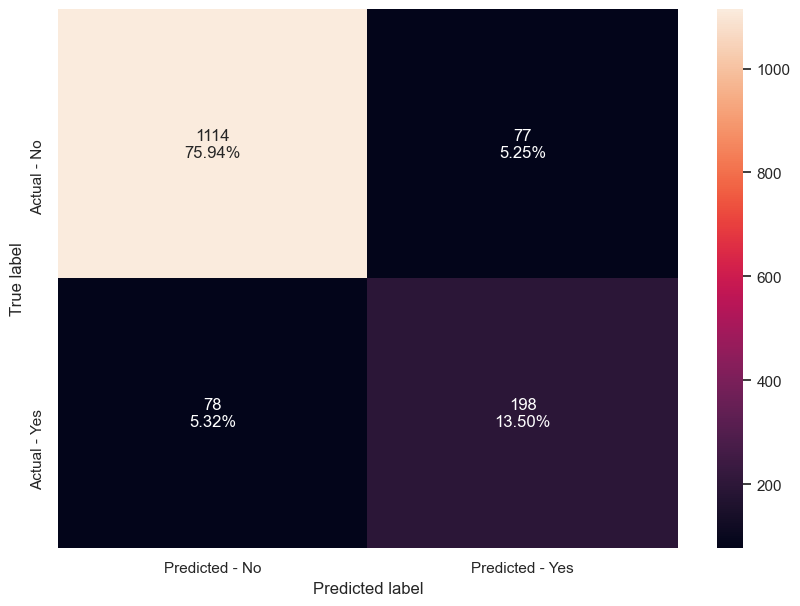

<IPython.core.display.Javascript object>

In [82]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(d_tree)

# Creating confusion matrix
make_confusion_matrix(d_tree, y_test)

Observation: The decision tree classifier model shows overfitting. We are looking for a model with the best recall scores due to the factor that recall takes into consideration all false negatives. The false negative impacts the business by the model predicting customers not wanting to purchase a package but they actually did want to purchase one; therefore, this would lead to some major potential sales loss. Even though our main objective is to get the highest recall scores, F1 scores are the second most important score in a model for this company as it takes into consideration the false positives. This would help the company not waste any resources on focusing on customers that would end up not purchasing a package. 

# **Desicion Tree Tuning (GridSearch)**

In [88]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.81, 1: 0.19}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.81, 1: 0.19}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

<IPython.core.display.Javascript object>

Accuracy on training set :  0.848289973691903
Accuracy on test set :  0.8398091342876619
Recall on training set :  0.20031055900621117
Recall on test set :  0.17028985507246377
Precision on training set :  0.9699248120300752
Precision on test set :  0.8867924528301887
F1-Score on training set :  0.33204633204633205
F1-Score on test set :  0.2857142857142857


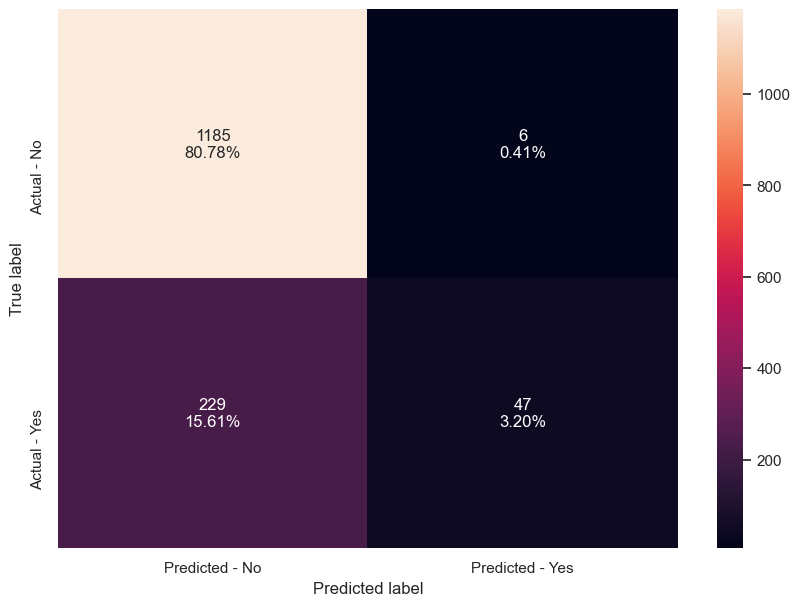

<IPython.core.display.Javascript object>

In [89]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator, y_test)

Observation: The decision tree with gridsearch improves the model by not overfitting the data; however, we are looking for the model with best recall. This model has poor recall and F1 scores. 

# **Random Forest Classifier**

Accuracy on training set :  1.0
Accuracy on test set :  0.9147920927062031
Recall on training set :  1.0
Recall on test set :  0.5869565217391305
Precision on training set :  1.0
Precision on test set :  0.9364161849710982
F1-Score on training set :  1.0
F1-Score on test set :  0.7216035634743876


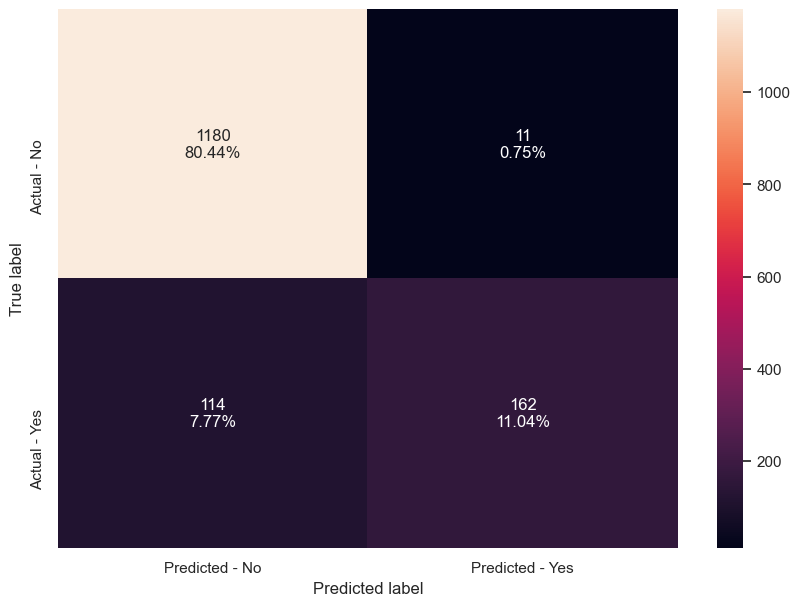

<IPython.core.display.Javascript object>

In [85]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(rf_estimator)

# Creating confusion matrix
make_confusion_matrix(rf_estimator, y_test)

Observation: The random forest classifier model is overfitting.

# **Random Forest Classifier Tuning (Gridsearch)**

In [87]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    class_weight={0: 0.81, 1: 0.19}, random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(5, 30, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(1, 15, 5),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 110, 10),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.81, 1: 0.19}, max_depth=20,
                       max_features=None, n_estimators=90, oob_score=True,
                       random_state=1)

<IPython.core.display.Javascript object>

Accuracy on training set :  1.0
Accuracy on test set :  0.9222903885480572
Recall on training set :  1.0
Recall on test set :  0.7065217391304348
Precision on training set :  1.0
Precision on test set :  0.8552631578947368
F1-Score on training set :  1.0
F1-Score on test set :  0.7738095238095237


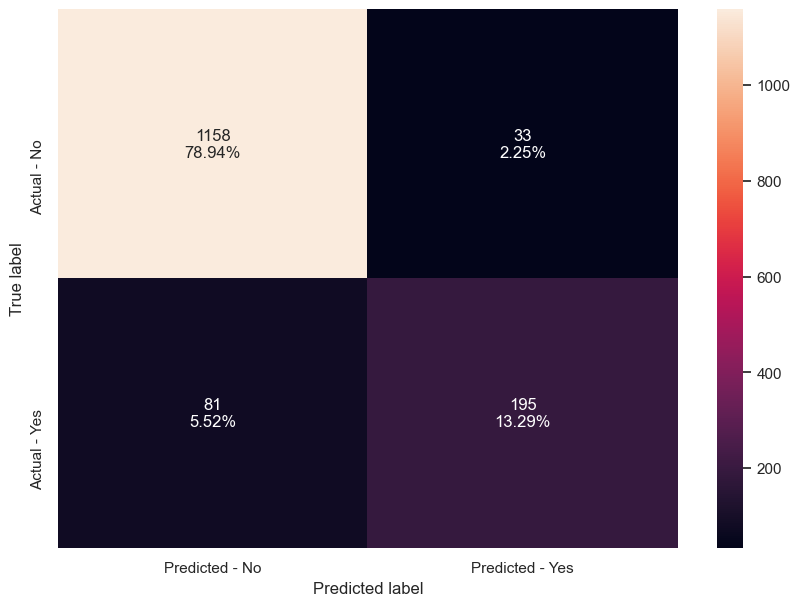

<IPython.core.display.Javascript object>

In [90]:
# Calculating different metrics
get_metrics_score(rf_tuned)

# Creating confusion matrix
make_confusion_matrix(rf_tuned, y_test)

Observation: The random forest with gridsearch is also overfitting the data.

# Bagging Classifier

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9113837764144512
Recall on training set :  0.9720496894409938
Recall on test set :  0.6268115942028986
Precision on training set :  0.9984051036682615
Precision on test set :  0.865
F1-Score on training set :  0.985051140833989
F1-Score on test set :  0.726890756302521


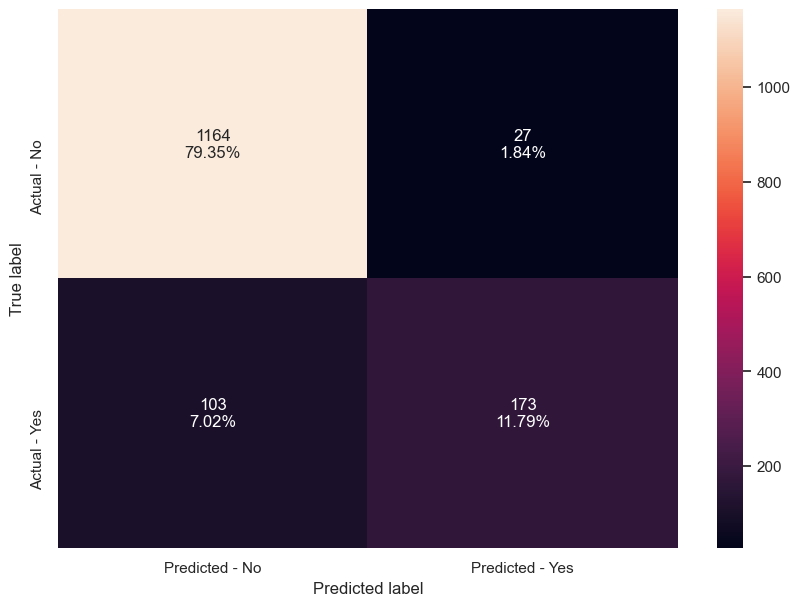

<IPython.core.display.Javascript object>

In [91]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(bagging_classifier)

# Creating confusion matrix
make_confusion_matrix(bagging_classifier, y_test)

Observation: The bagging classifier model improves overfitting and the recall and F1 on training set is not bad; however, both recall and F1 scores on the test set are low.

# Bagging Classifier - Hyperparameter Tuning

In [92]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    bagging_estimator_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9168370824812543
Recall on training set :  0.9984472049689441
Recall on test set :  0.605072463768116
Precision on training set :  1.0
Precision on test set :  0.9277777777777778
F1-Score on training set :  0.9992229992229993
F1-Score on test set :  0.7324561403508772


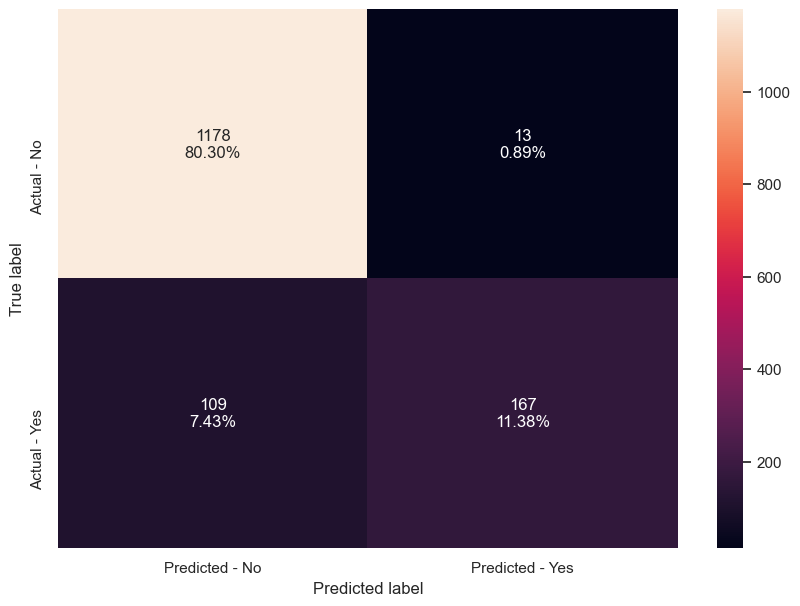

<IPython.core.display.Javascript object>

In [93]:
# Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

# Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned, y_test)

Observation: Bagging model with tuning improves F1 test score for a bit but it is overfitting the data.

# AdaBoost Classifier

Accuracy on training set :  0.8494592224495762
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.32142857142857145
Recall on test set :  0.30434782608695654
Precision on training set :  0.7263157894736842
Precision on test set :  0.672
F1-Score on training set :  0.4456404736275566
F1-Score on test set :  0.4189526184538654


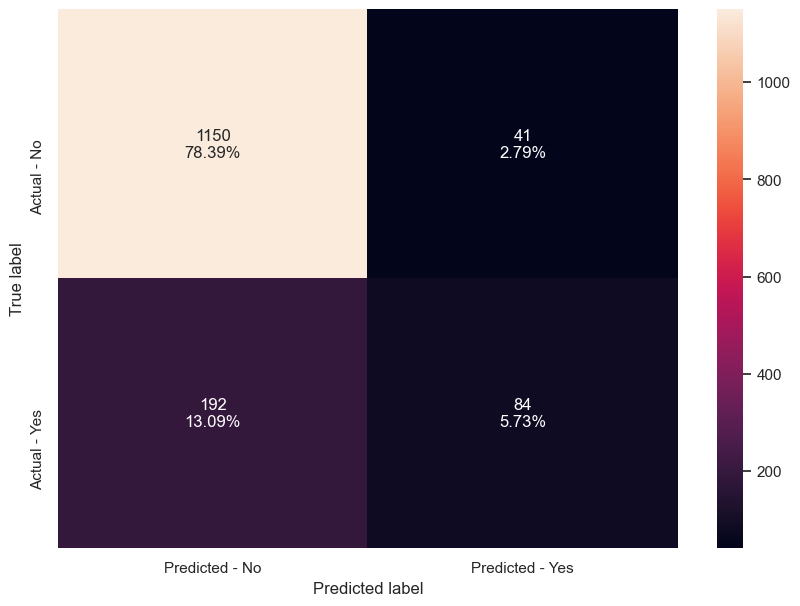

<IPython.core.display.Javascript object>

In [94]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(ab_classifier)

# Creating confusion matrix
make_confusion_matrix(ab_classifier, y_test)

Observation: AdaBoost model improves overfitting but both recall and F1 scores are really low.

# AdaBoost Classifier - Hyperparameter Tuning

In [95]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.5000000000000002, n_estimators=100,
                   random_state=1)

<IPython.core.display.Javascript object>

Accuracy on training set :  0.9912306343174511
Accuracy on test set :  0.8868438991138378
Recall on training set :  0.9596273291925466
Recall on test set :  0.6702898550724637
Precision on training set :  0.9935691318327974
Precision on test set :  0.7115384615384616
F1-Score on training set :  0.976303317535545
F1-Score on test set :  0.6902985074626865


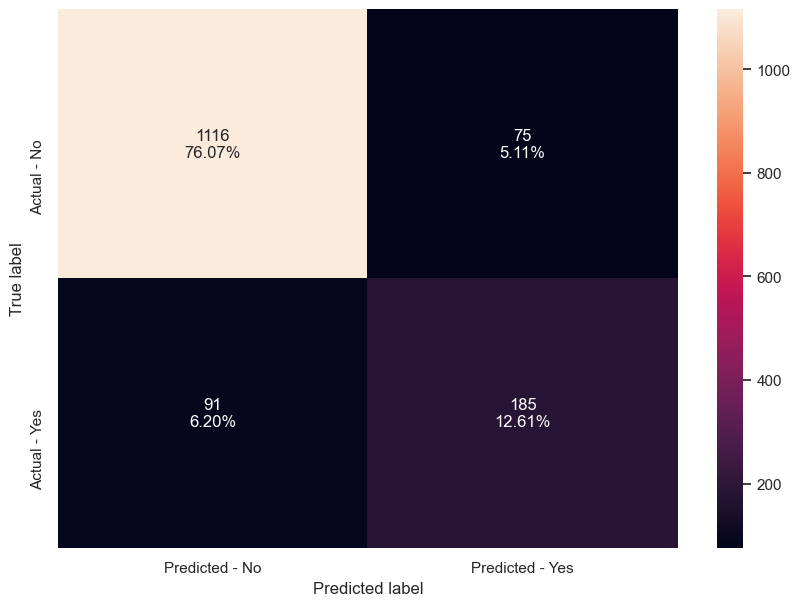

<IPython.core.display.Javascript object>

In [96]:
# Calculating different metrics
get_metrics_score(abc_tuned)

# Creating confusion matrix
make_confusion_matrix(abc_tuned, y_test)

Observation: Adaboost with tunning model improves overfitting but both recall and F1 test scores are low.

# Gradient Boosting Classifier

Accuracy on training set :  0.8859982461268635
Accuracy on test set :  0.8643490115882754
Recall on training set :  0.45652173913043476
Recall on test set :  0.3695652173913043
Precision on training set :  0.8802395209580839
Precision on test set :  0.8031496062992126
F1-Score on training set :  0.6012269938650306
F1-Score on test set :  0.5062034739454093


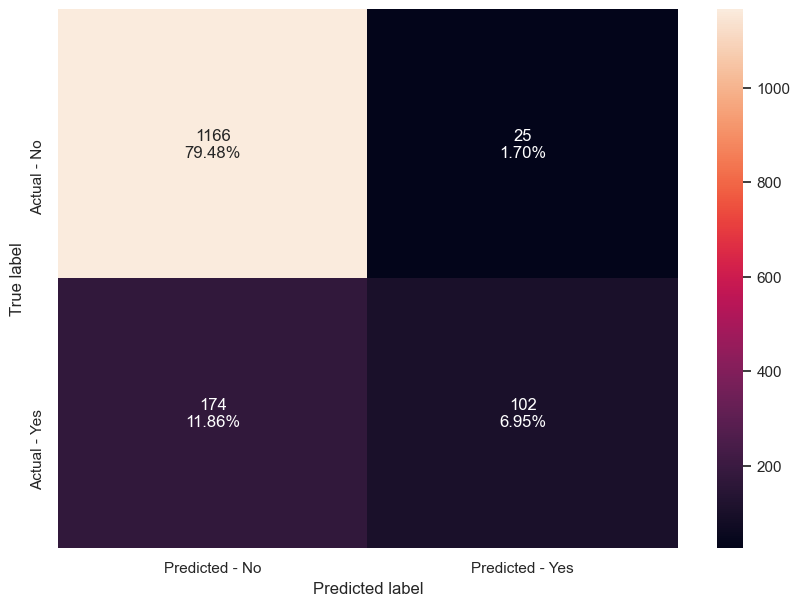

<IPython.core.display.Javascript object>

In [97]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(gb_classifier)

# Creating confusion matrix
make_confusion_matrix(gb_classifier, y_test)

Observation: Gradiant boosting model improves overfitting but both recall and F1 scores are low.

# Gradient Boosting Classifier - Hyperparameter Tuning

In [98]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

Accuracy on training set :  0.9169833382052032
Accuracy on test set :  0.8820722563053851
Recall on training set :  0.5993788819875776
Recall on test set :  0.5
Precision on training set :  0.9368932038834952
Precision on test set :  0.7976878612716763
F1-Score on training set :  0.7310606060606061
F1-Score on test set :  0.6146993318485523


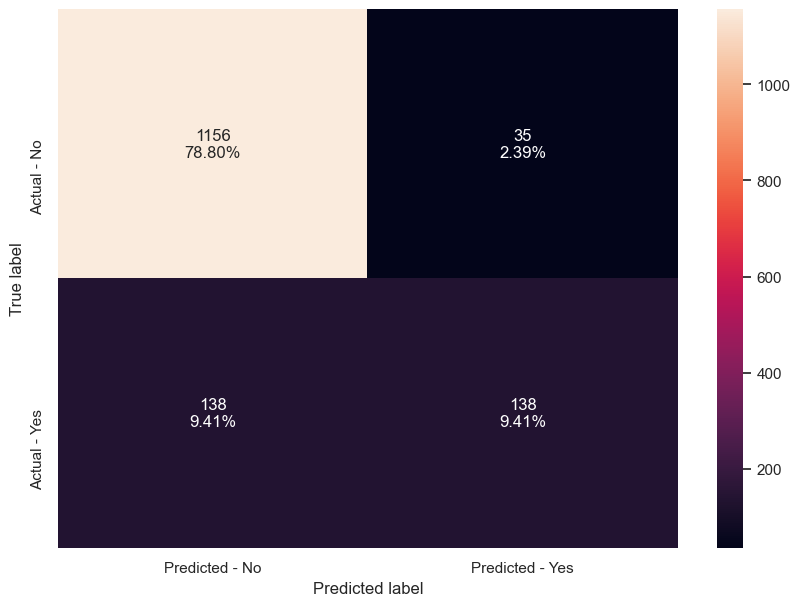

<IPython.core.display.Javascript object>

In [99]:
# Calculating different metrics
get_metrics_score(gbc_tuned)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned, y_test)

Observation: Gradiant boosting with tunning improves in overfititng but is really low on recall scores.

# XGBoost Classifier

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9263803680981595
Recall on training set :  0.9984472049689441
Recall on test set :  0.6702898550724637
Precision on training set :  1.0
Precision on test set :  0.9158415841584159
F1-Score on training set :  0.9992229992229993
F1-Score on test set :  0.7740585774058578


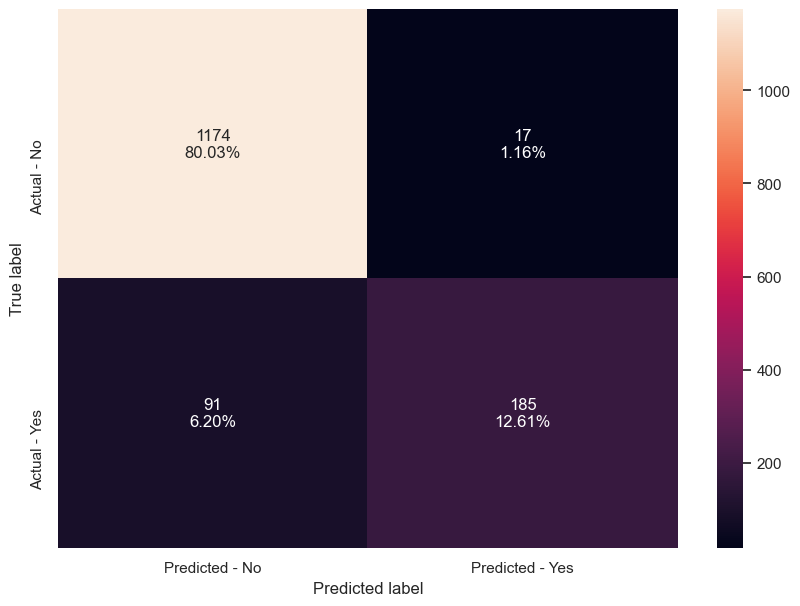

<IPython.core.display.Javascript object>

In [100]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss", nthread=-1)
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(xgb_classifier)

# Creating confusion matrix
make_confusion_matrix(xgb_classifier, y_test)

Observation: XG boost model doesnt overfit the data as much and has better recall and F1 scores.

# XGBoost Classifier - Hyperparameter Tuning

In [101]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

<IPython.core.display.Javascript object>

Accuracy on training set :  0.890382928968138
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.9239130434782609
Recall on test set :  0.8152173913043478
Precision on training set :  0.6460369163952225
Precision on test set :  0.5739795918367347
F1-Score on training set :  0.7603833865814696
F1-Score on test set :  0.6736526946107786


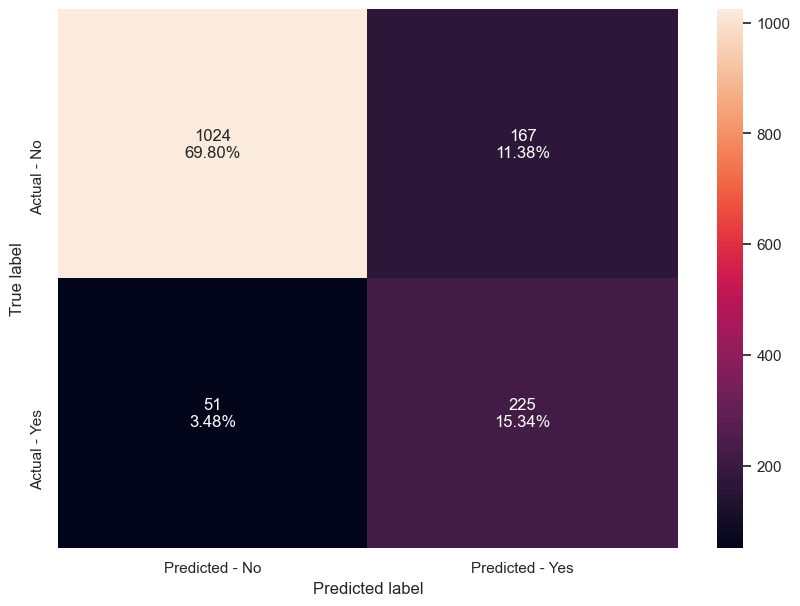

<IPython.core.display.Javascript object>

In [102]:
# Calculating different metrics
get_metrics_score(xgb_tuned)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

Observation: XG boost model with tunning, doesnt overfit the data and Recall test scores are much better even thought we can see that the F1 scores are a bit lower. This is would be a good model since our main goal is to get the highest recall.

# Stacking Classifier

In [103]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.81,
                                                                     1: 0.19},
                                                       max_depth=20,
                                                       max_features=None,
                                                       n_estimators=90,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                Deci...
                                                 feature_types=None, gamma=0,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.05,
                                                 max_bin=256,
                                                 max_cat_threshold=64,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=50, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, ...))

<IPython.core.display.Javascript object>

Accuracy on training set :  0.9856767027185034
Accuracy on test set :  0.8629856850715747
Recall on training set :  0.9968944099378882
Recall on test set :  0.8333333333333334
Precision on training set :  0.9317851959361393
Precision on test set :  0.5974025974025974
F1-Score on training set :  0.9632408102025506
F1-Score on test set :  0.6959152798789712


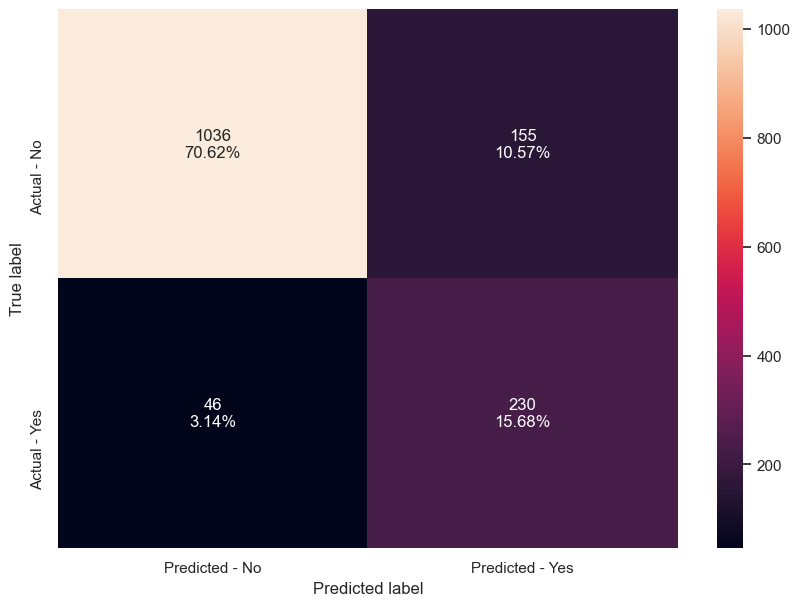

<IPython.core.display.Javascript object>

In [104]:
# Calculating different metrics
get_metrics_score(stacking_classifier)

# Creating confusion matrix
make_confusion_matrix(stacking_classifier, y_test)

Observation: Stacking is the best model, doesnt overfit the data and improves on recall and F1 scores a bit more.

# Comparing all models

In [105]:
# defining list of models
models = [
    d_tree,
    dtree_estimator,
    rf_estimator,
    rf_tuned,
    bagging_classifier,
    bagging_estimator_tuned,
    ab_classifier,
    abc_tuned,
    gb_classifier,
    gbc_tuned,
    xgb_classifier,
    xgb_tuned,
    stacking_classifier,
]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

<IPython.core.display.Javascript object>

In [109]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree",
            "Tuned Decision Tree",
            "Random Forest",
            "Tuned Random Forest",
            "Bagging Classifier",
            "Bagging Classifier Tuned",
            "AdaBoost Classifier",
            "Tuned AdaBoost Classifier",
            "Gradient Boosting Classifier",
            "Tuned Gradient Boosting Classifier",
            "XGBoost Classifier",
            "Tuned XGBoost Classifier",
            "Stacking Classifier",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1-Score": f1_train,
        "Test_F1-Score": f1_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
12,Stacking Classifier,0.985677,0.862986,0.996894,0.833333,0.931785,0.597403,0.963241,0.695915
11,Tuned XGBoost Classifier,0.890383,0.851397,0.923913,0.815217,0.646037,0.573980,0.760383,0.673653
0,Decision Tree,1.000000,0.894342,1.000000,0.717391,1.000000,0.720000,1.000000,0.718693
3,Tuned Random Forest,1.000000,0.922290,1.000000,0.706522,1.000000,0.855263,1.000000,0.773810
7,Tuned AdaBoost Classifier,0.991231,0.886844,0.959627,0.670290,0.993569,0.711538,0.976303,0.690299
10,XGBoost Classifier,0.999708,0.926380,0.998447,0.670290,1.000000,0.915842,0.999223,0.774059
4,Bagging Classifier,0.994446,0.911384,0.972050,0.626812,0.998405,0.865000,0.985051,0.726891
5,Bagging Classifier Tuned,0.999708,0.916837,0.998447,0.605072,1.000000,0.927778,0.999223,0.732456
2,Random Forest,1.000000,0.914792,1.000000,0.586957,1.000000,0.936416,1.000000,0.721604
9,Tuned Gradient Boosting Classifier,0.916983,0.882072,0.599379,0.500000,0.936893,0.797688,0.731061,0.614699


<IPython.core.display.Javascript object>

Observation: Due to the fact that we are looking for the best recall scores, i sorted by test recall scores. We have the stacking classifier and the tuned XGBoost as the best models for this project.

# Feature importance of Stacking Classifier

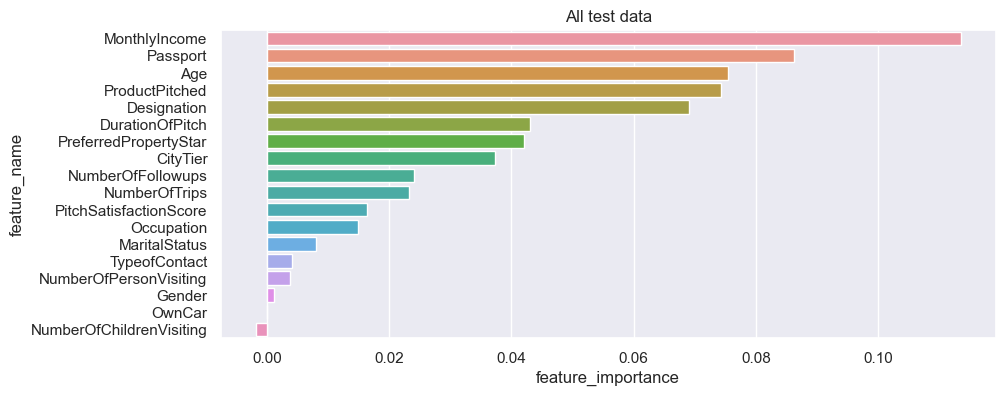

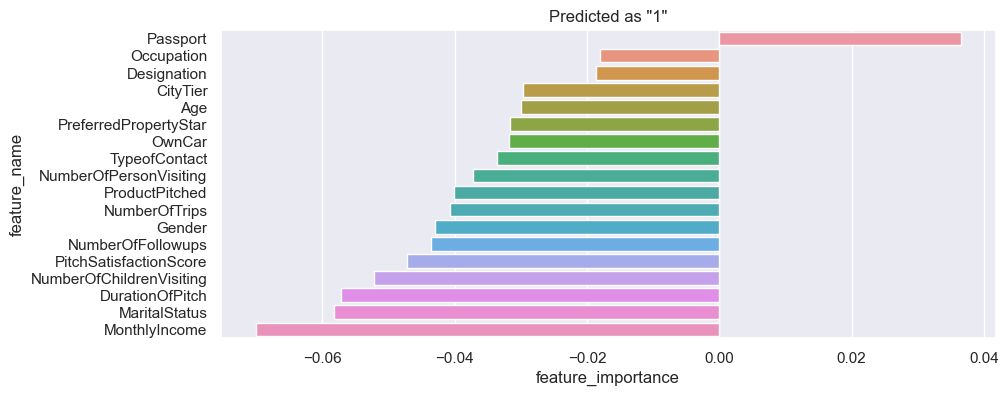

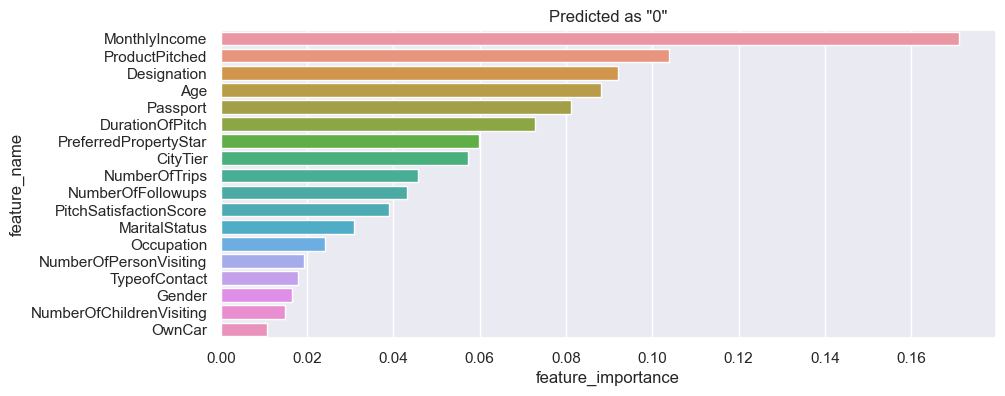

<IPython.core.display.Javascript object>

In [131]:
def plot_feature_importances(model, X, y, title):
    result = permutation_importance(
        model, X, y, n_repeats=100, random_state=0, n_jobs=-1
    )
    df = pd.DataFrame(
        {"feature_name": X.columns, "feature_importance": result.importances_mean}
    )
    plt.figure(figsize=(10, 4))
    sns.barplot(
        data=df,
        x="feature_importance",
        y="feature_name",
        order=df.sort_values("feature_importance", ascending=False).feature_name,
    )
    plt.title(title)
    plt.show()


plot_feature_importances(stacking_classifier, X_test, y_test, "All test data")

y_pred = stacking_classifier.predict(X_test)
plot_feature_importances(
    stacking_classifier, X_test[y_pred == 1], y_test[y_pred == 1], 'Predicted as "1"'
)
plot_feature_importances(
    stacking_classifier, X_test[y_pred == 0], y_test[y_pred == 0], 'Predicted as "0"'
)

Observations: 
* I decided to include 3 feature importance graphs; the first graph includes all data. In terms of all test data, the most important variables were Monthly income, passport and age. However, since our project goal is to predict if a customer will buy a package or not. It is important see what features will determine if a customer will buy a package or not. Predict 1 shows features importances for those who bought a package, which is Passport. Having a passport would be the main feature of a customer buying a package. The most important features of a customer not buying a package are: Monthly income, Product Pitched and Desgination. 

# Conclusions-

* Most customers lived in City Tier 1.  
* Most customers in the data set were around 36-37 years old.
* The average duration of pitch is around 15-16 mins.
* Most number of people visiting is 3.
* Most number of follow ups is 4.
* Most preferred property star is 3.
* Number of trips a customer takes per year are 2-3 trips.
* Most customers in our data set dont have a passport.
* The average monthly income is between 23,000-24,000.
* Most customers in our data set are male. 
* Most occupations are salaried and small business owners.
* Most customers are married and executive and manager designation status.
* Most product pitched were both basic and deluxe.
* Highest positively correlated variable to our target variable (prodtaken) is passport.
* Highest negatively correlated variables to prod taken is monthly income. People purchasing a travel package had a lower monthly income. 
* Customers who purchased travel packages had more followups.
* Even though only 1419 customers were company invited, most of those customers did purchase a travel package. Hence, i would suggest focsuing more on company invited customers.
* Smaller business owners, salaried and freelancer  customers bought packages.
* Customers pitched the basic package ended up purchasing the package more than other packages.
* Even though there are only 1598 single customers in the dataset, most of them purchased a package. Therefore, focusing on single customers can ramp up sales. 
* The stacking classifier model had the best recall scores. Both Stacking and XG boost tuned models had best recall scores and second best F1 scores. 
* Most feature importance variable for those customers purchasing a travel package is passport, therefore, having a valid passport determines if they will purchase a package. Focusing on customers with a valid passport will ramp up sales.
* Most feature importance variables for those customers not purchasing a travel package are: monthly income, product pitched and designation. Therefore, focusing on executives, starting by pitching the basic package and making it as affordable as possible or adding perks to those packages might help on selling more packages.
* Including more incentives in other packages might help in promoting them.